In [1]:
import numpy as np
import pandas as pd
import matplotlib
from tqdm import tqdm 
from sklearn import metrics 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from scipy.stats import  kurtosis

# styling:
import seaborn as sns
plt.style.use(['ggplot'])
sns.set_palette("deep")

matplotlib.rcParams["figure.dpi"] = 300


In [2]:
all_dir = [x[0] for x in os.walk('.')]
set_dirs = []
for dir in all_dir:
    if len(dir.split('/')) == 3:
        set_dirs.append(dir)
set_dirs.sort()

In [3]:
# Ensemble data set up
# algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe', 'sincerities', 'ss_cor', 'ss_ranked']
algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe', 'ss_cor', 'ss_ranked']
min_max_scaler = preprocessing.MinMaxScaler()

In [4]:
ensemble_df = pd.read_csv(set_dirs[0] + '/ensemble.csv')
all_data = pd.DataFrame(columns=ensemble_df.columns)

tf_set = np.array(['G'+str(i) for i in range(1,101)])
np.random.seed(4)
np.random.shuffle(tf_set)
train_tf_list = tf_set[:66]
test_tf_list = tf_set[20:40]

tf_set = np.array(['G'+str(i) for i in range(1,51)])
np.random.seed(4)
np.random.shuffle(tf_set)
train_tf_list_s = tf_set[:33]
test_tf_list_s = tf_set[10:20]



In [5]:

ensemble_df_list = []
train_df_list = []


for set_dir in set_dirs:
    train_ind = []
    test_ind = []
    ensemble_df = pd.read_csv(set_dir + '/ensemble.csv')
    ensemble_df = ensemble_df.replace(np.nan,0)
    # ensemble_df = ensemble_df.drop(columns=['singe'])
    for index, row in ensemble_df.iterrows():
        tf_name = row['edge_name'].split('_')[0]
        if (len(ensemble_df) < 5000):
            if (tf_name in train_tf_list_s):
                train_ind.append(index)
            if (tf_name in test_tf_list_s):
                test_ind.append(index)
        else:
            if (tf_name in train_tf_list):
                train_ind.append(index)
            if (tf_name in test_tf_list):
                test_ind.append(index)
    test_df = ensemble_df.loc[test_ind]
    train_df = ensemble_df.loc[train_ind]
    # ensemble_df = ensemble_df.drop(train_ind+test_ind)
    # ensemble_df = ensemble_df.drop(test_ind)
    ensemble_df = ensemble_df.drop(train_ind)
    all_data = pd.concat([all_data, test_df])
    train_df_list.append(train_df)
    ensemble_df_list.append(ensemble_df)

all_data = all_data.astype({'edge_exist': 'int8'})
all_X = all_data[algo_names] 
# all_X = min_max_scaler.fit_transform(all_X)
all_y = all_data['edge_exist']


In [6]:
set_names =['dream3_100#1', 'dream3_100#2','dream3_100#3','dream3_100#4','dream3_100#5', 'dream4_100#1', 'dream4_100#2','dream4_100#3','dream4_100#4','dream4_100#5']
# algo_print_names = ['OutPredict', 'Inferelator', 'GRNBoost', 'Genie3', 'GRISLI', 'GRNVBEM', 'LEAP',  'PIDC', 'PPCOR', 'SCODE', 'SCRIBE', 'SINCERITIES']
algo_print_names = ['OutPredict', 'Inferelator', 'GRNBoost', 'Genie3', 'GRISLI', 'GRNVBEM', 'LEAP',  'PIDC', 'PPCOR', 'SCODE', 'SCRIBE']
# algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe', 'sincerities']
algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe']


In [7]:
all_train_df = pd.concat(train_df_list)

26.131717706135728


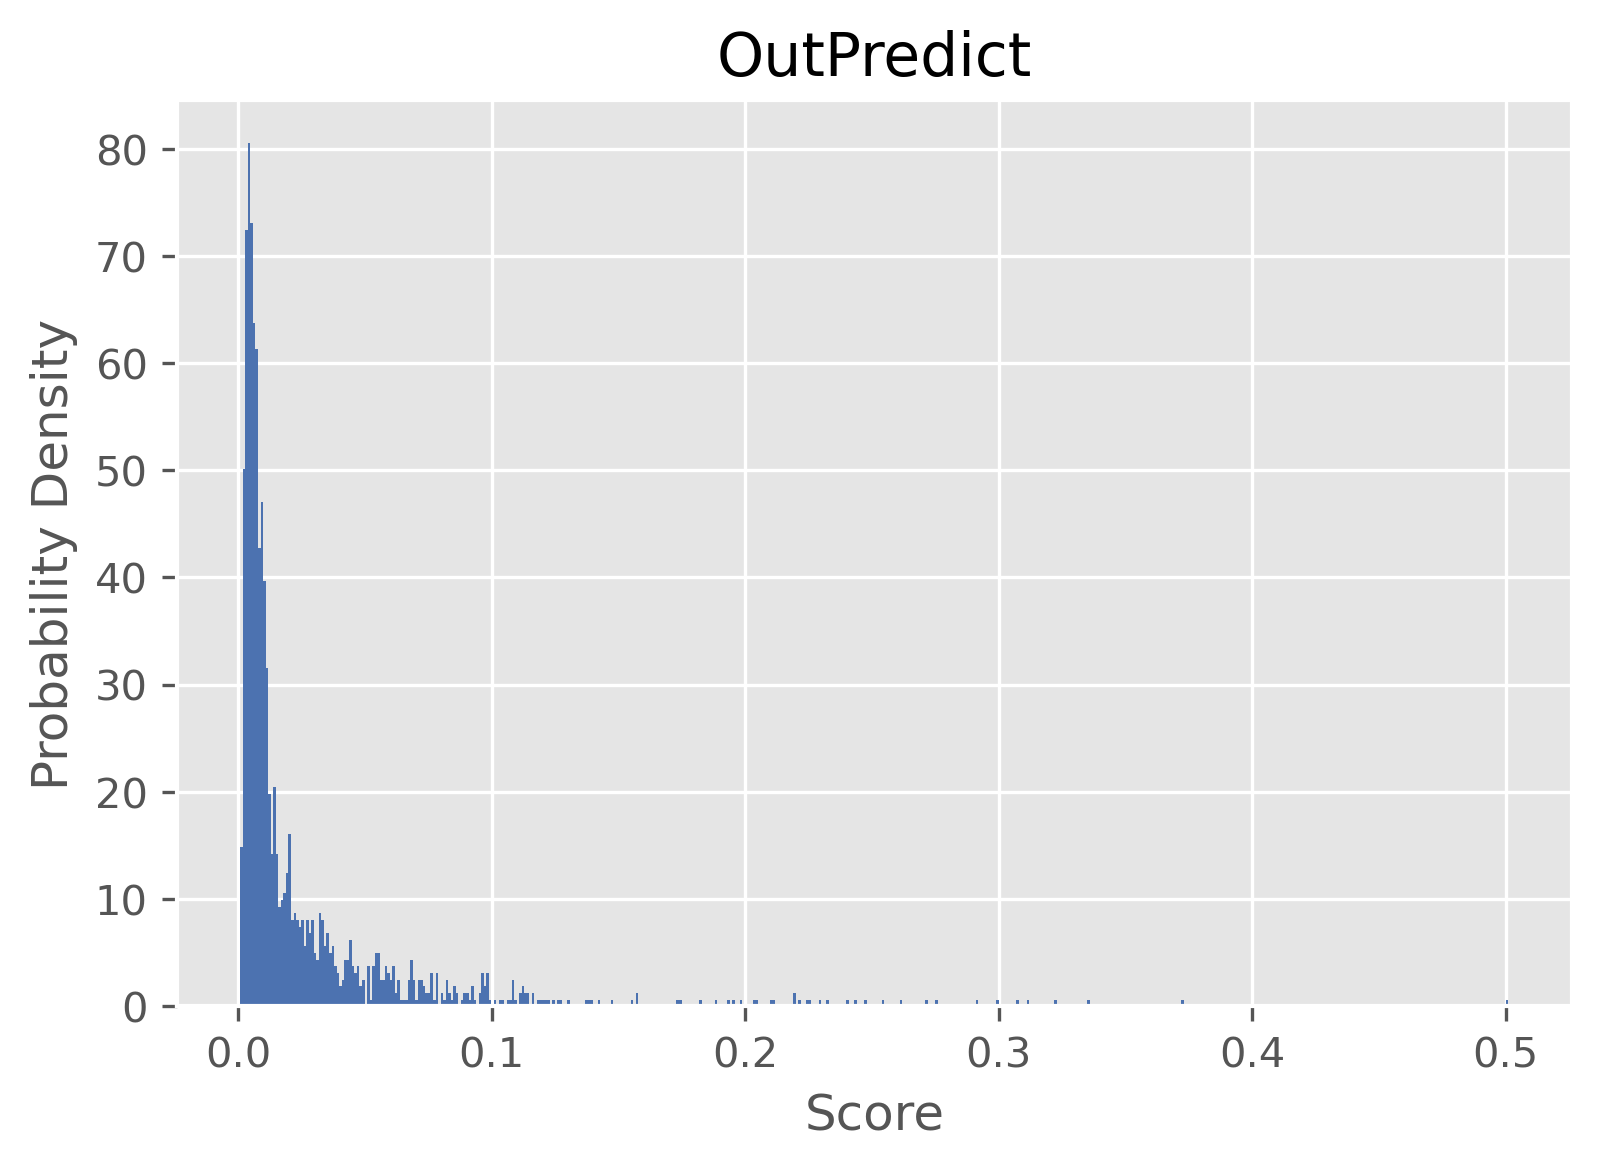

3.603117433281377


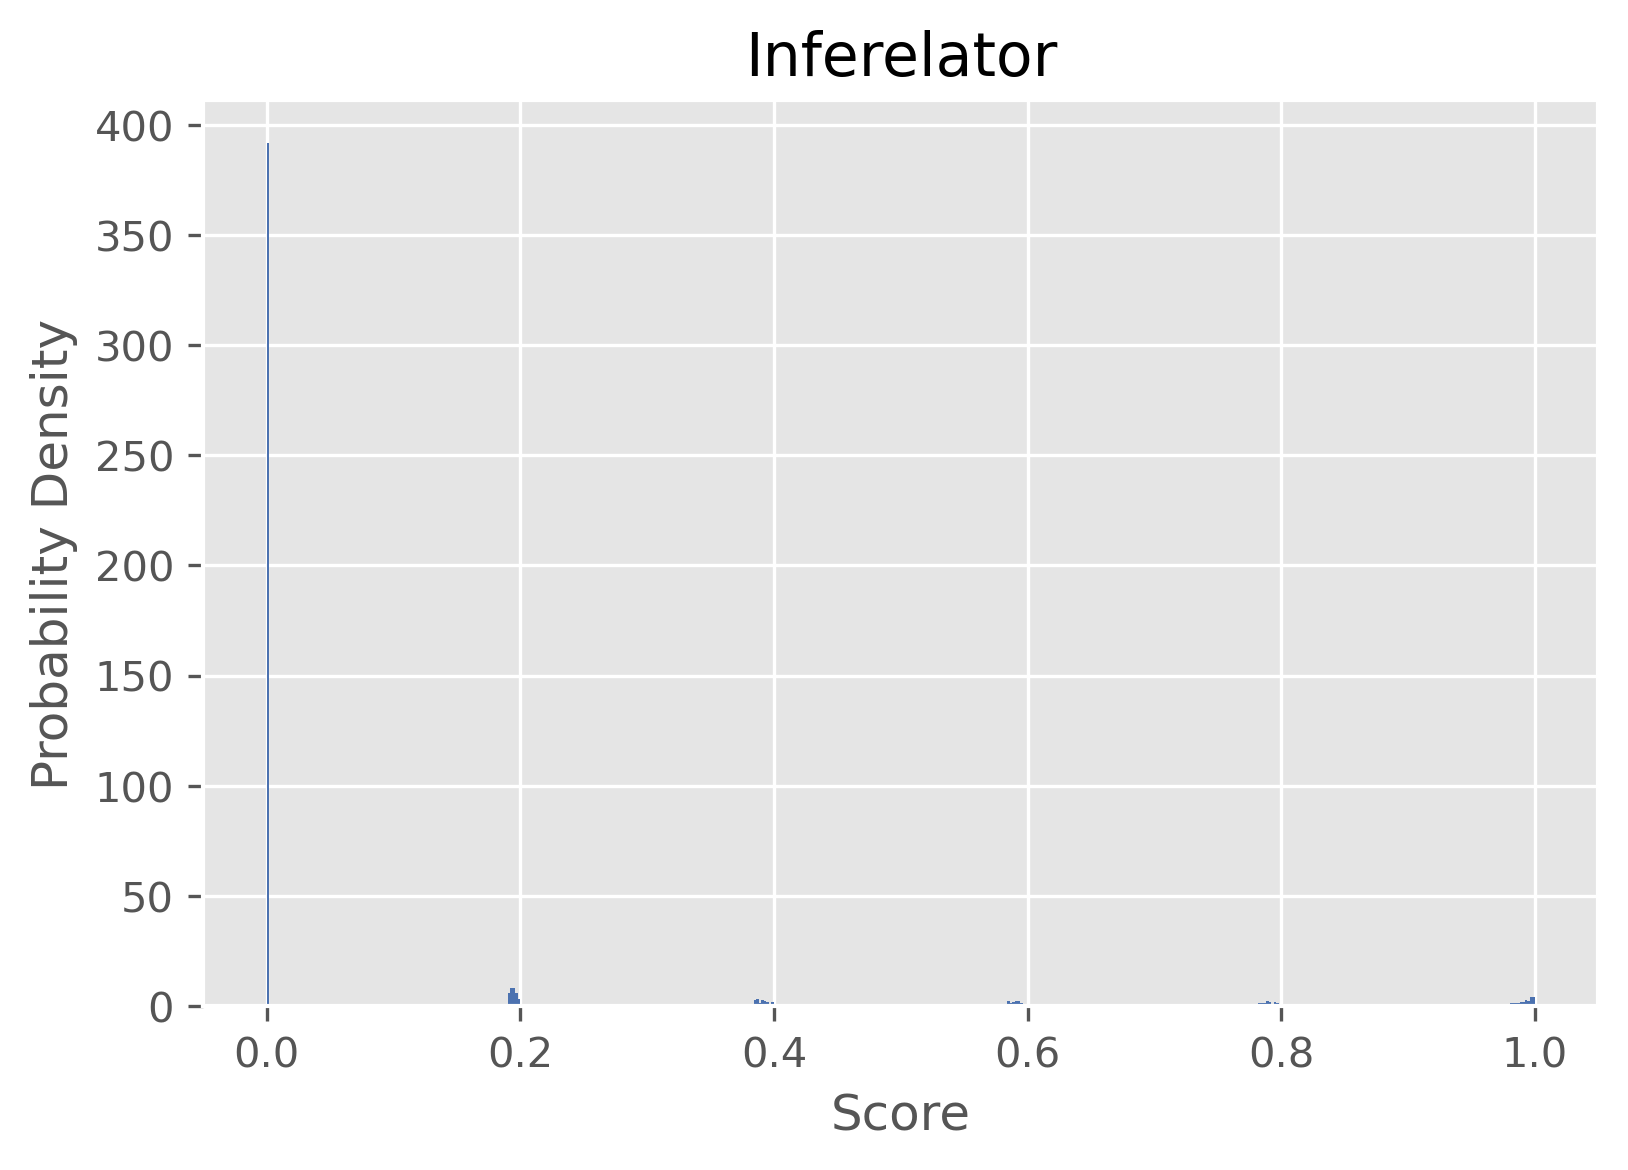

10.695292233986832


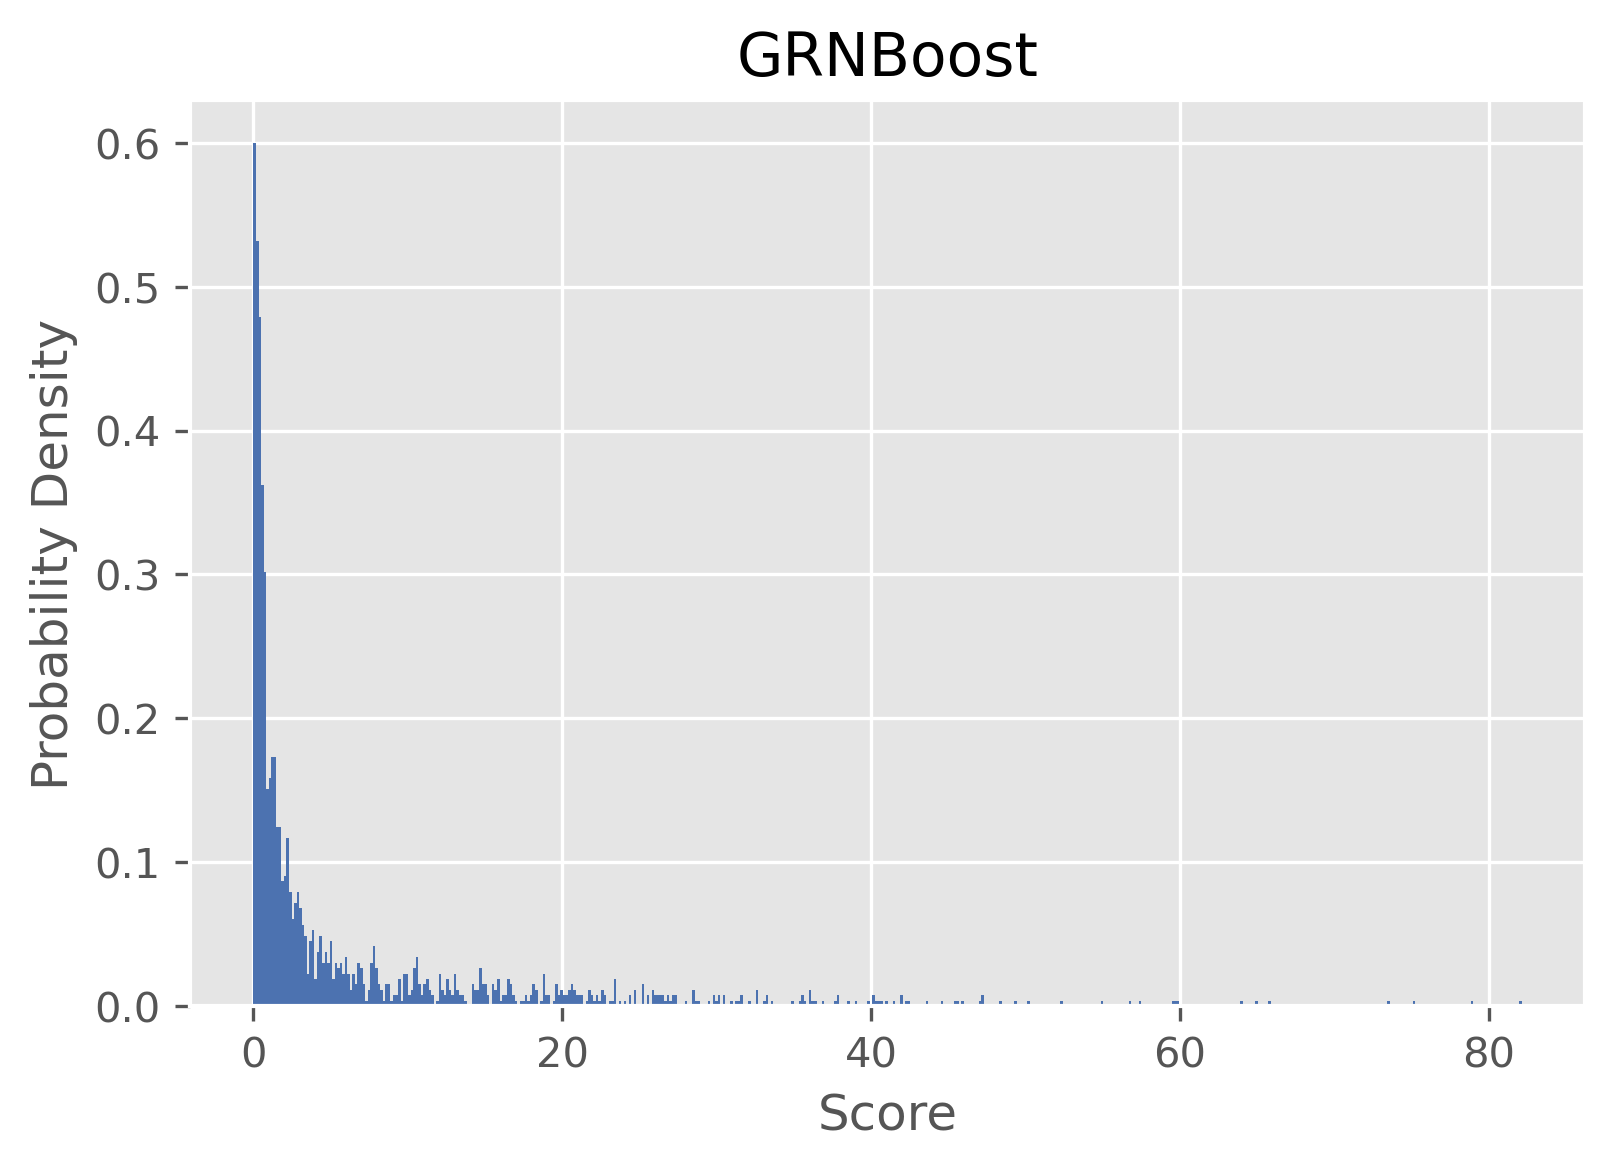

5.6028110659434756


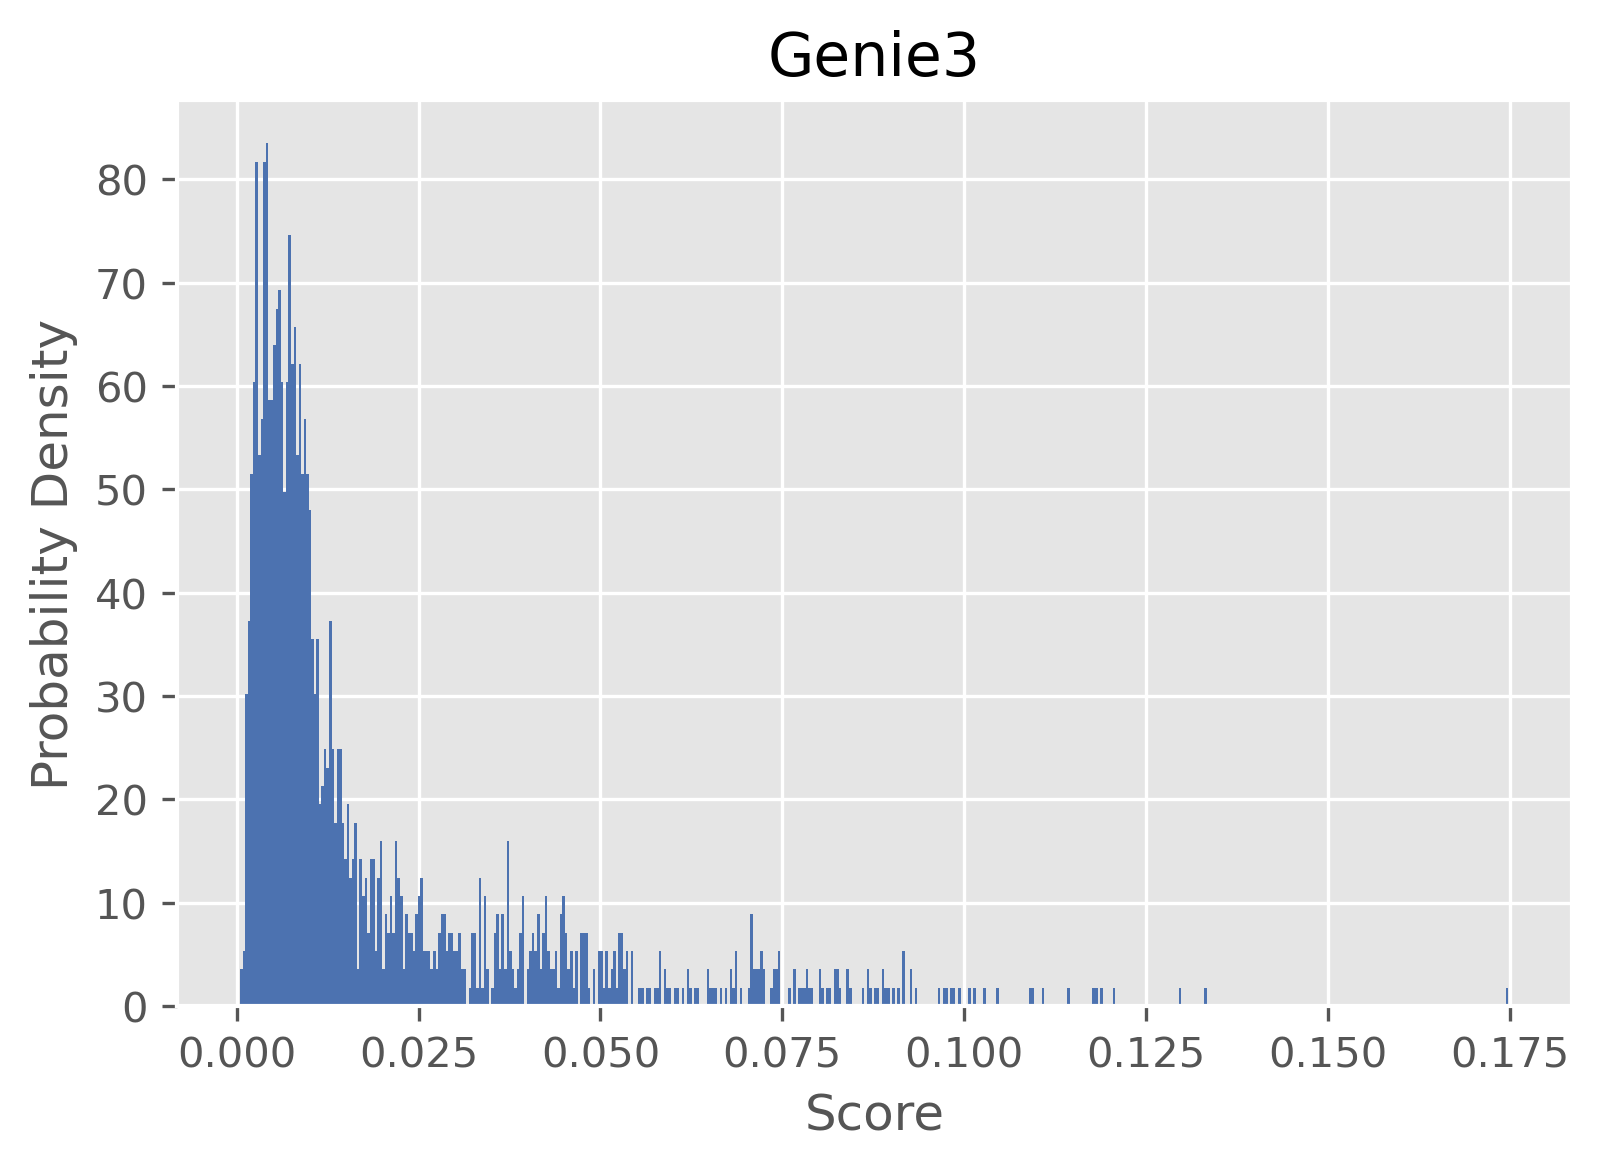

-1.2869586214907511


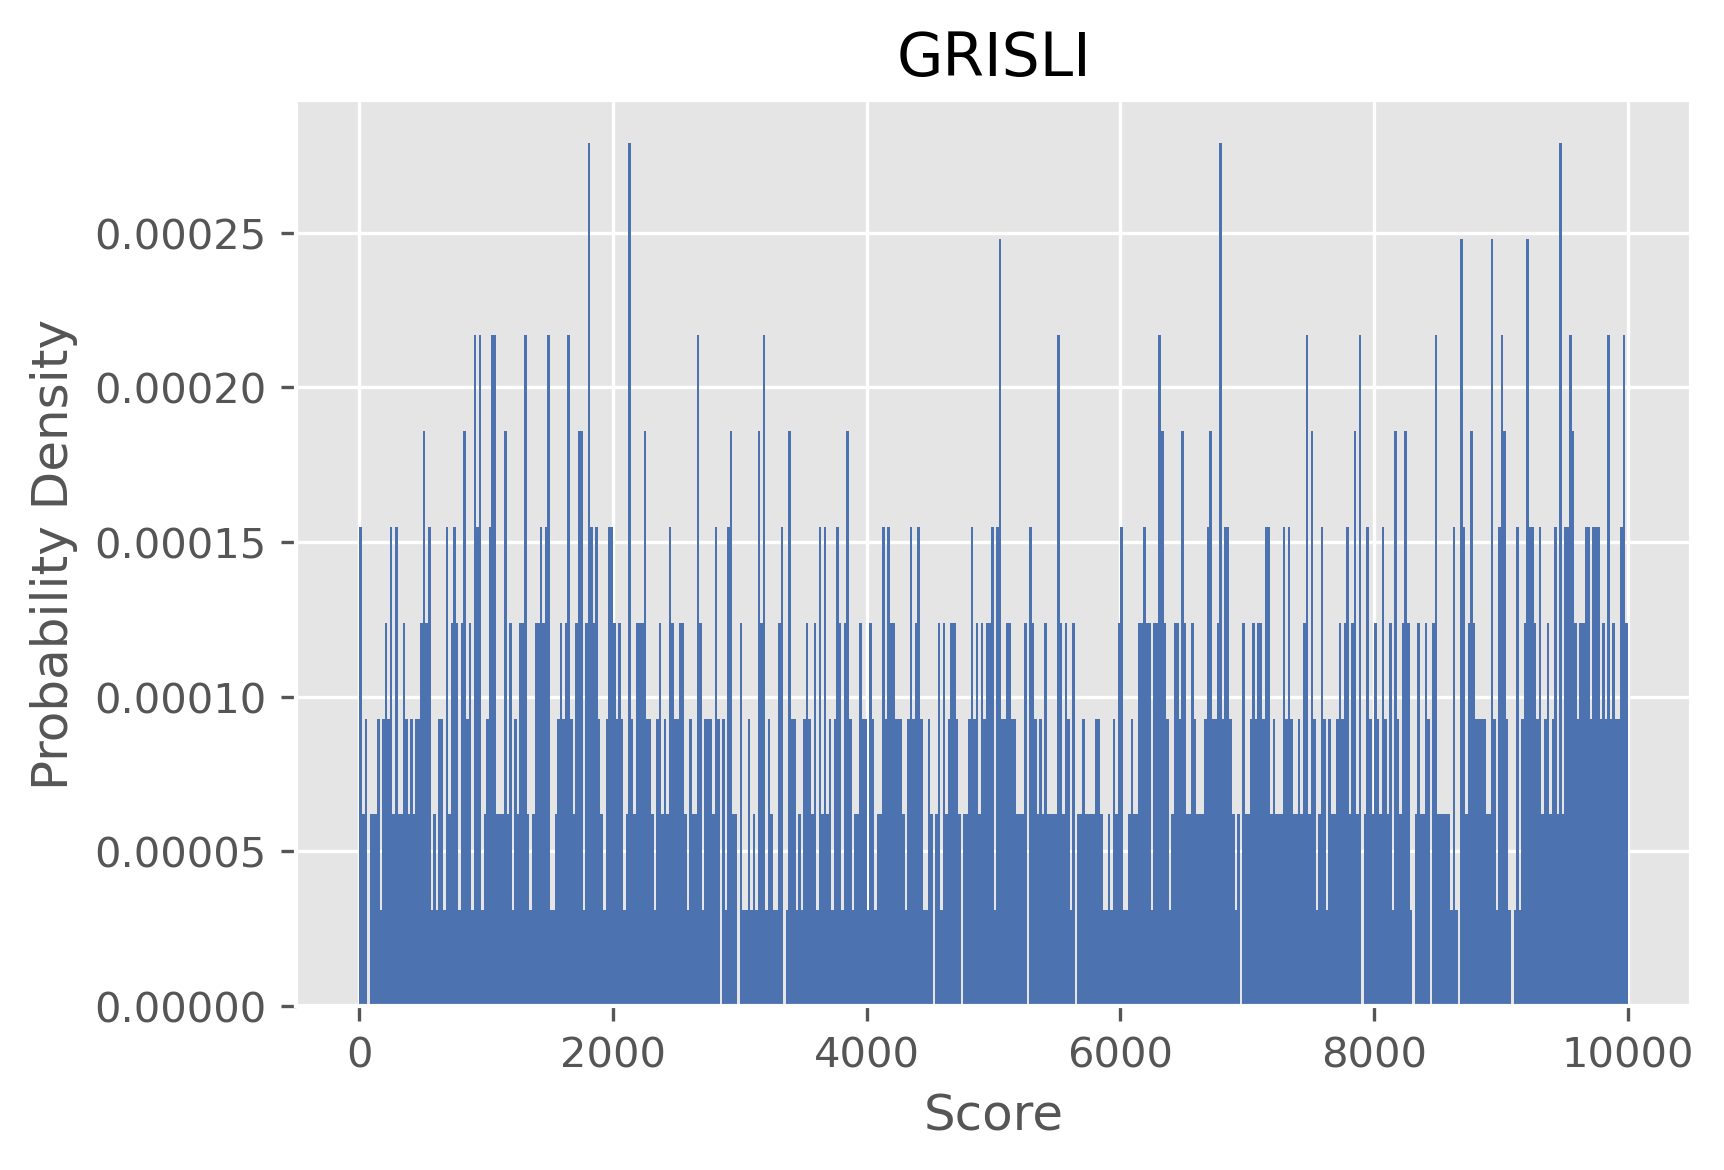

0.8392820200452551


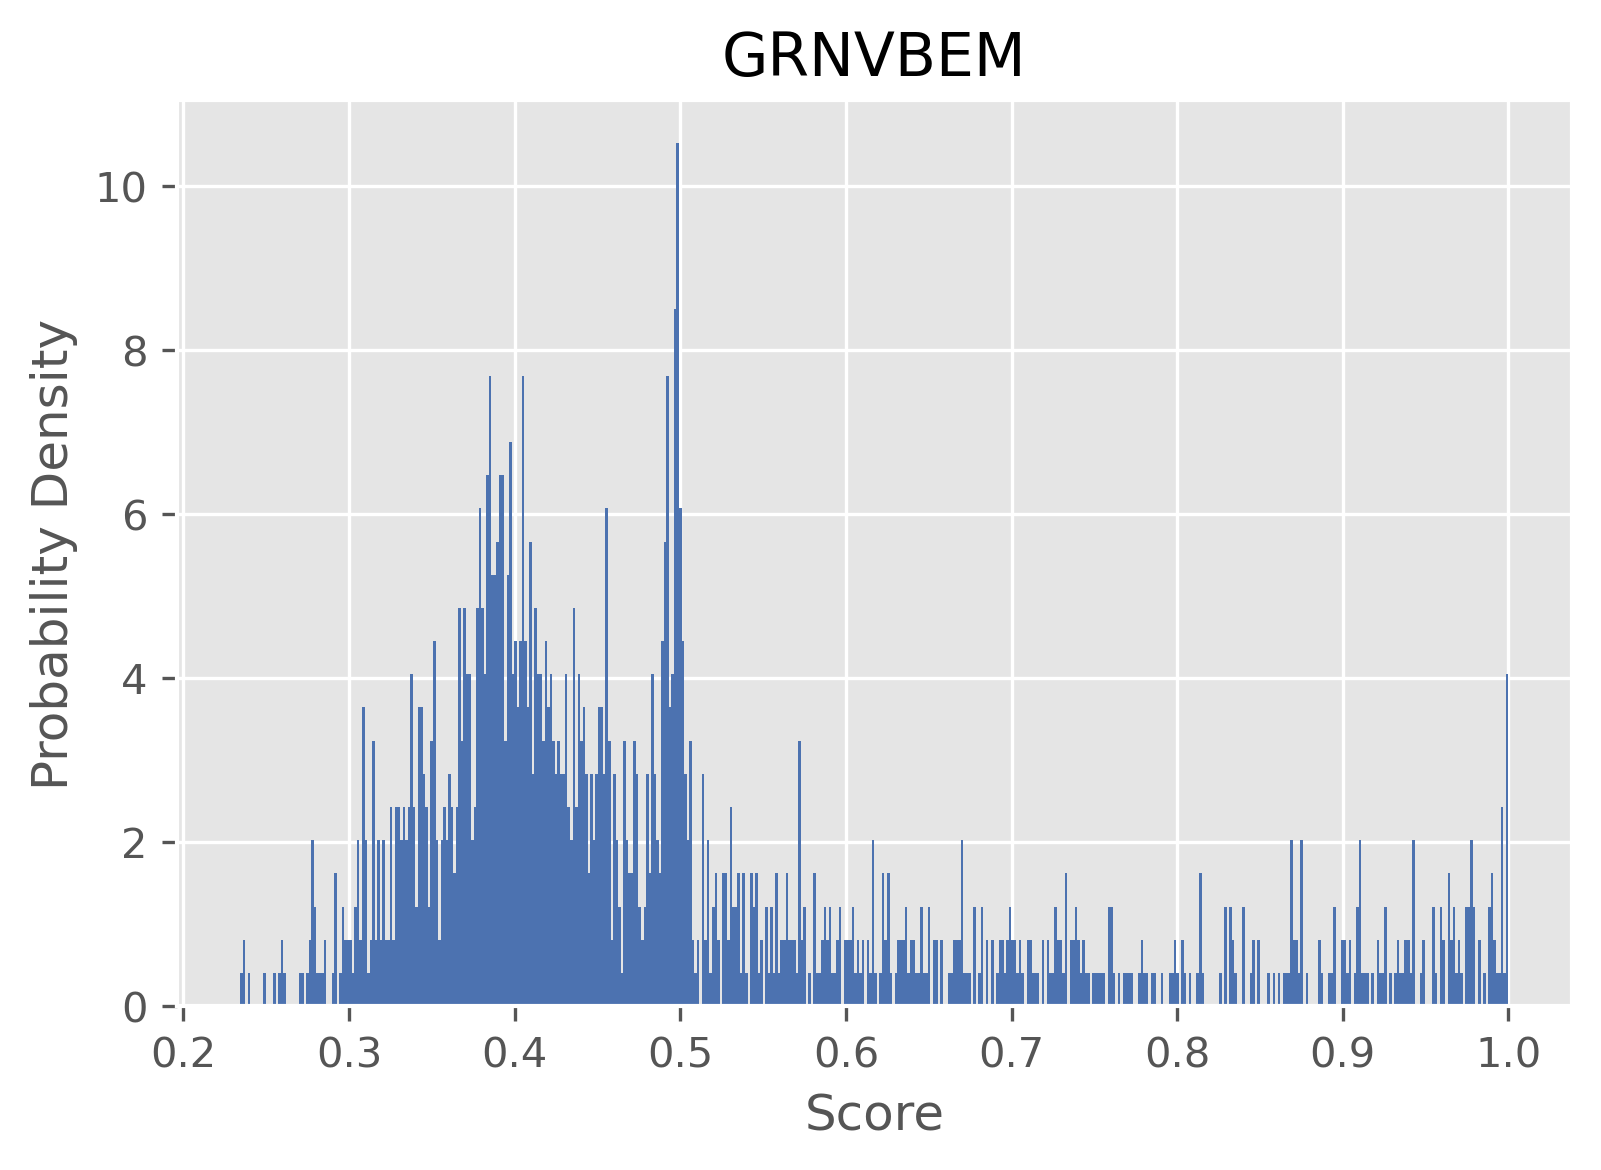

0.9622962325425348


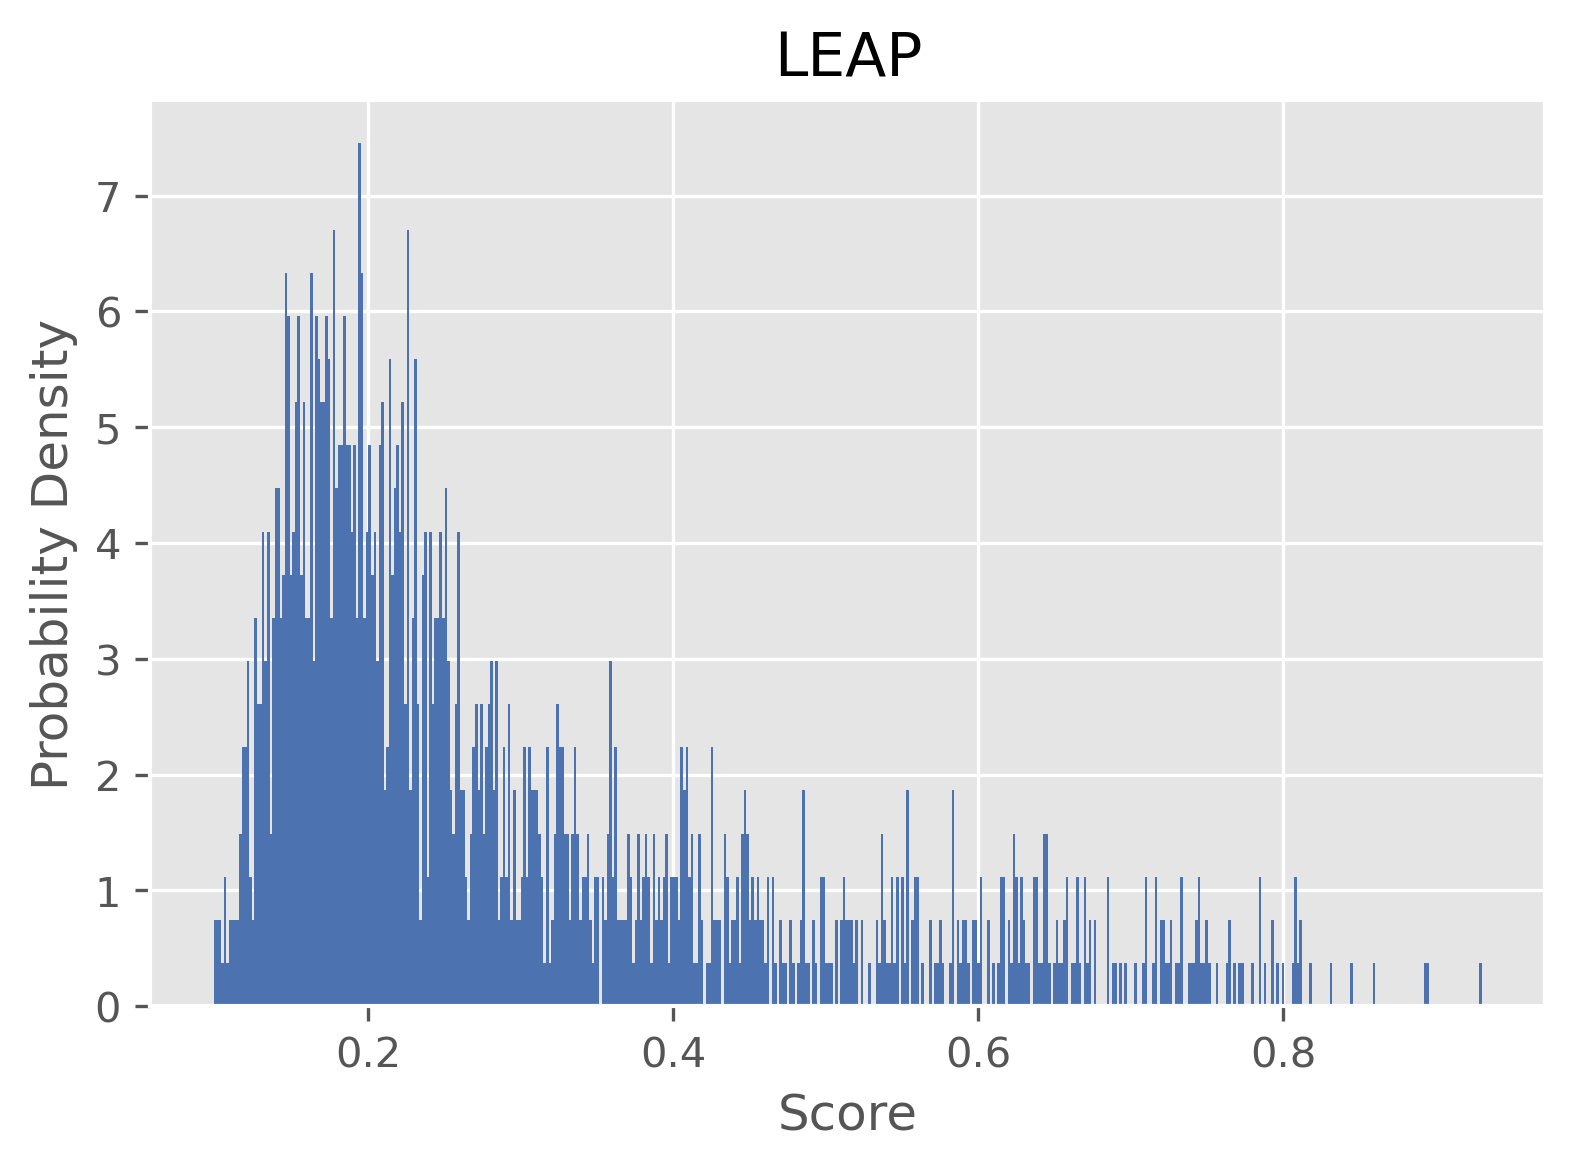

-0.9661524619316104


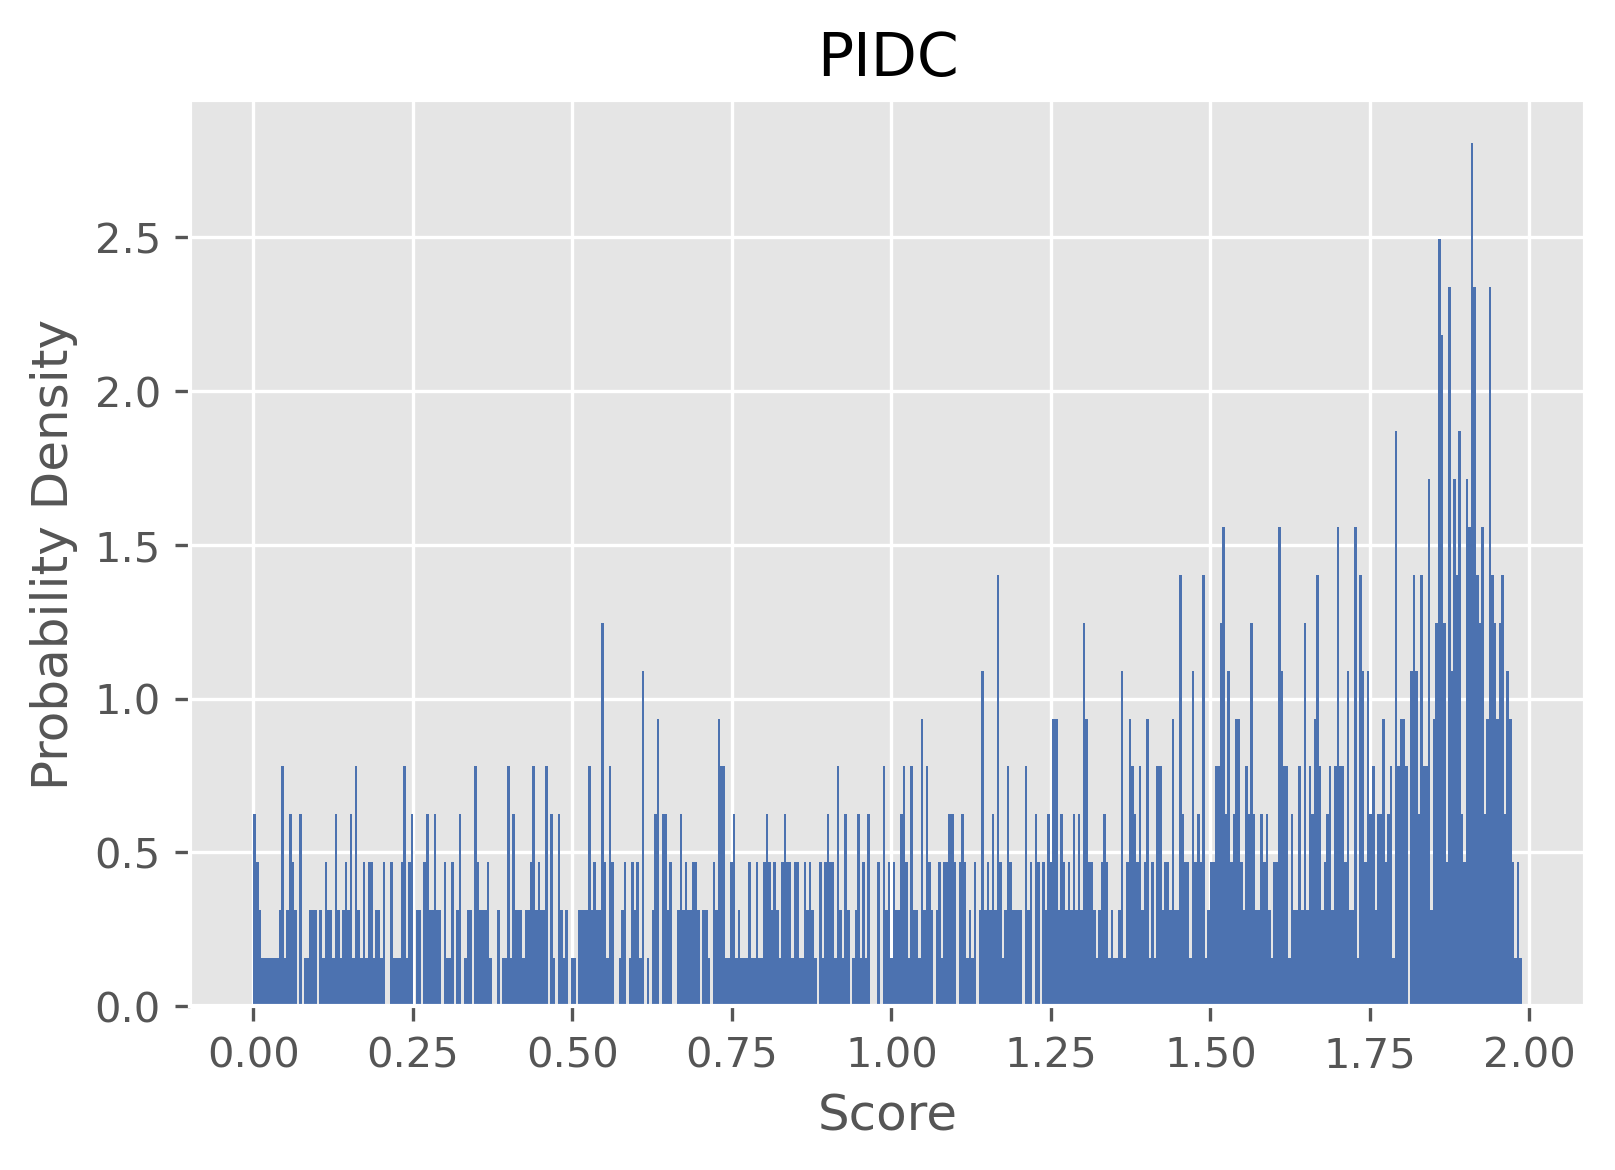

24.3982736764437


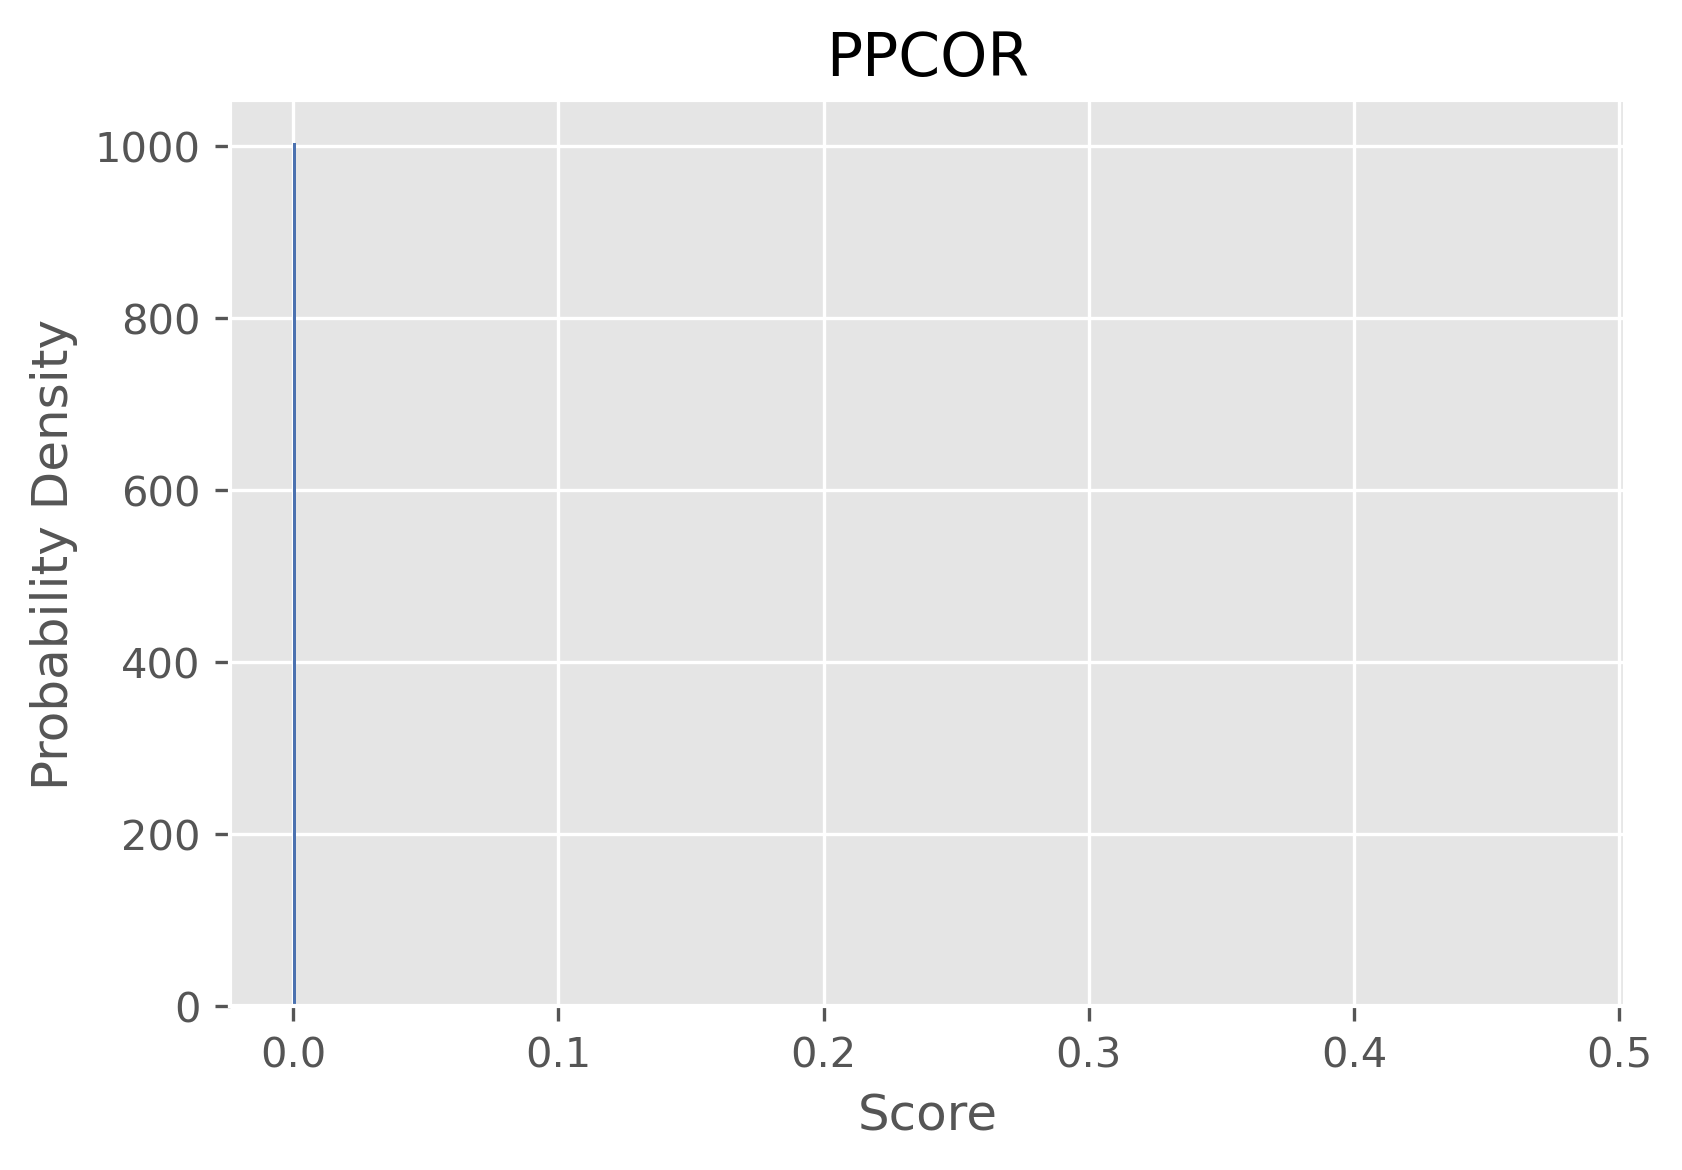

9.553548591932898


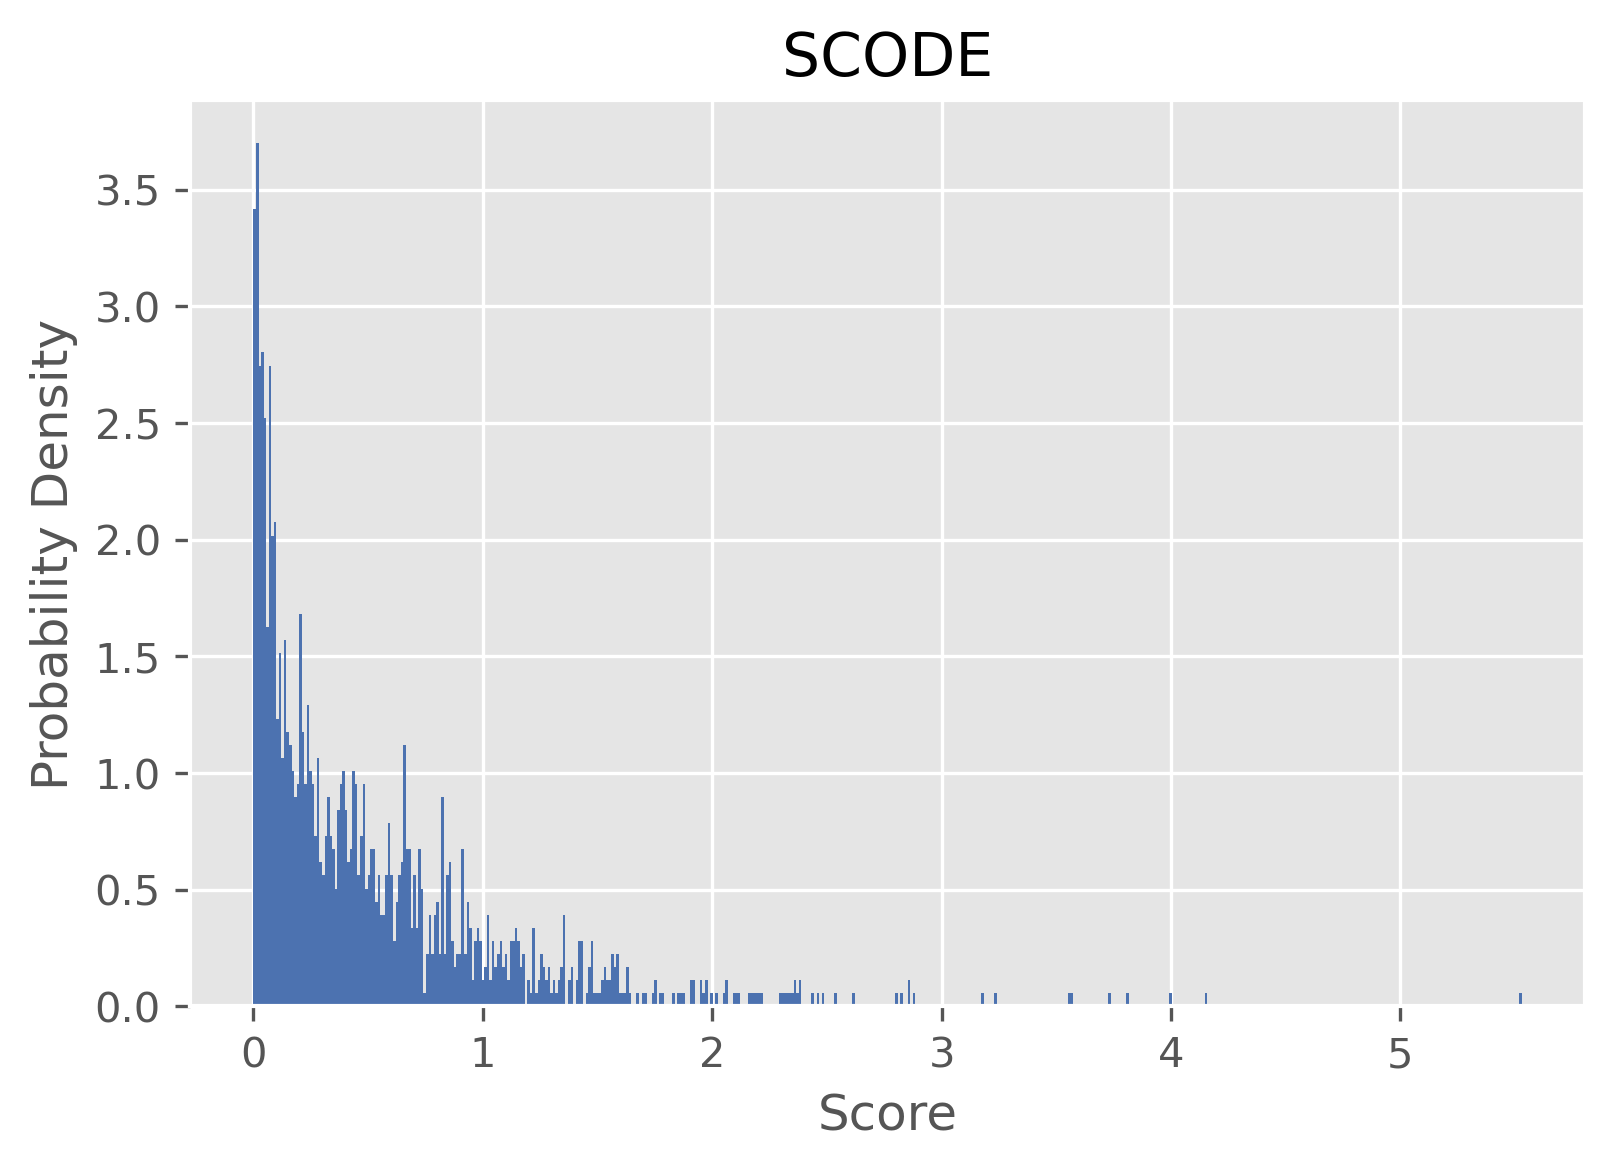

3.3344357515752066


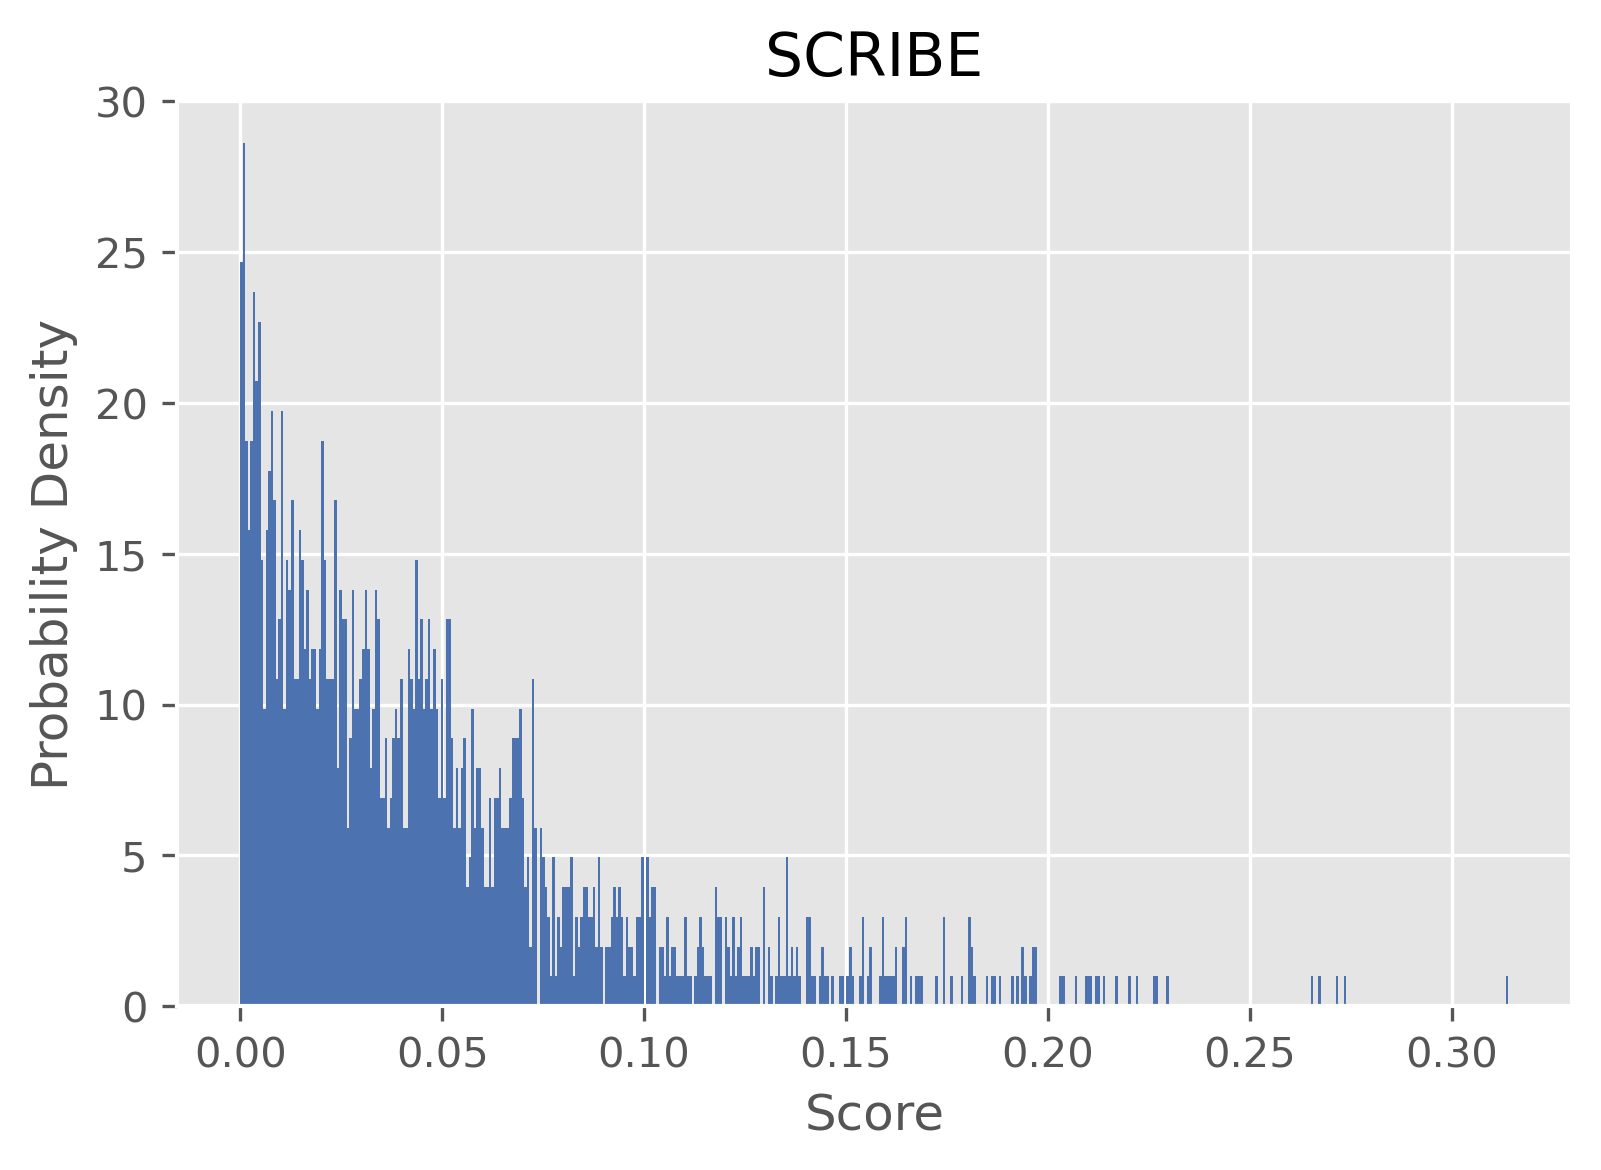

In [13]:
for i, algo in enumerate(algo_names):
    fig, ax = plt.subplots()
    ax.hist(all_train_df[all_train_df['edge_exist']==1][algo], bins=500, density=True, stacked=False)
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title(algo_print_names[i])
    # save_path = './pde_hist/' + algo_print_names[i] + '.png'
    print(kurtosis(all_train_df[all_train_df['edge_exist']==1][algo]))
    plt.show()


204.56823241413147


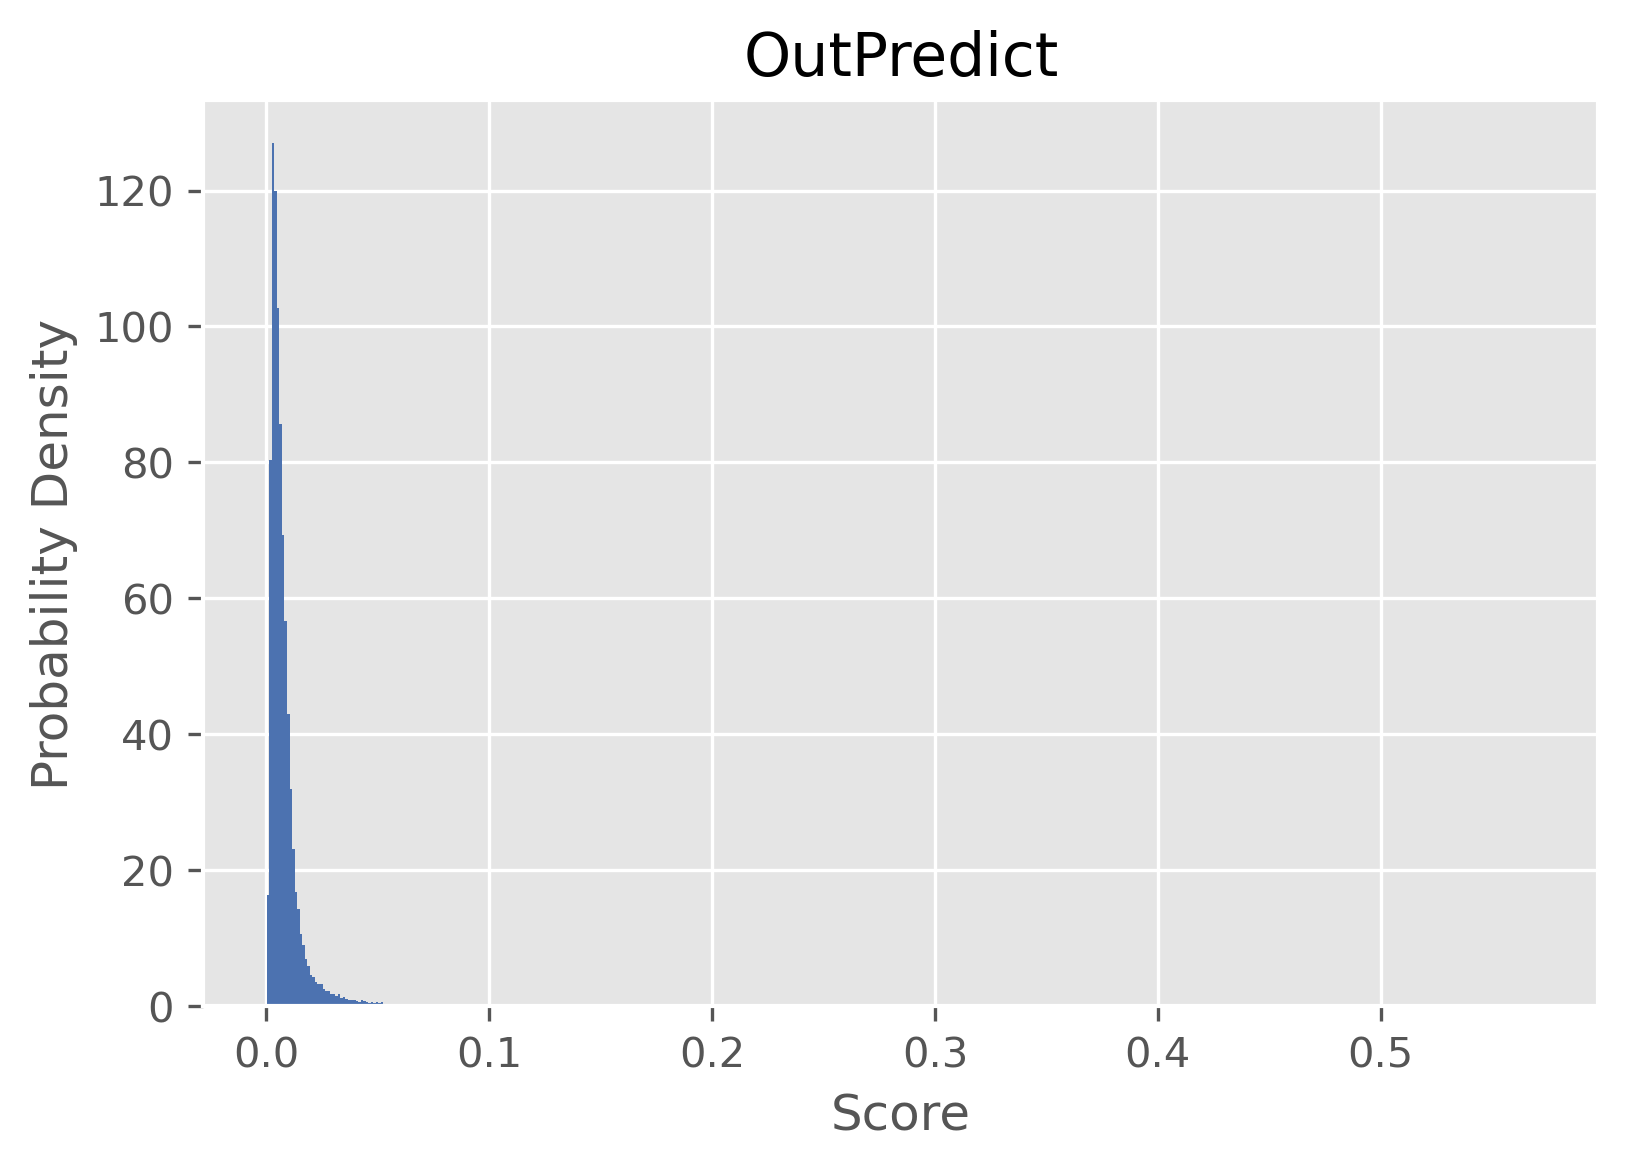

50.55227685296064


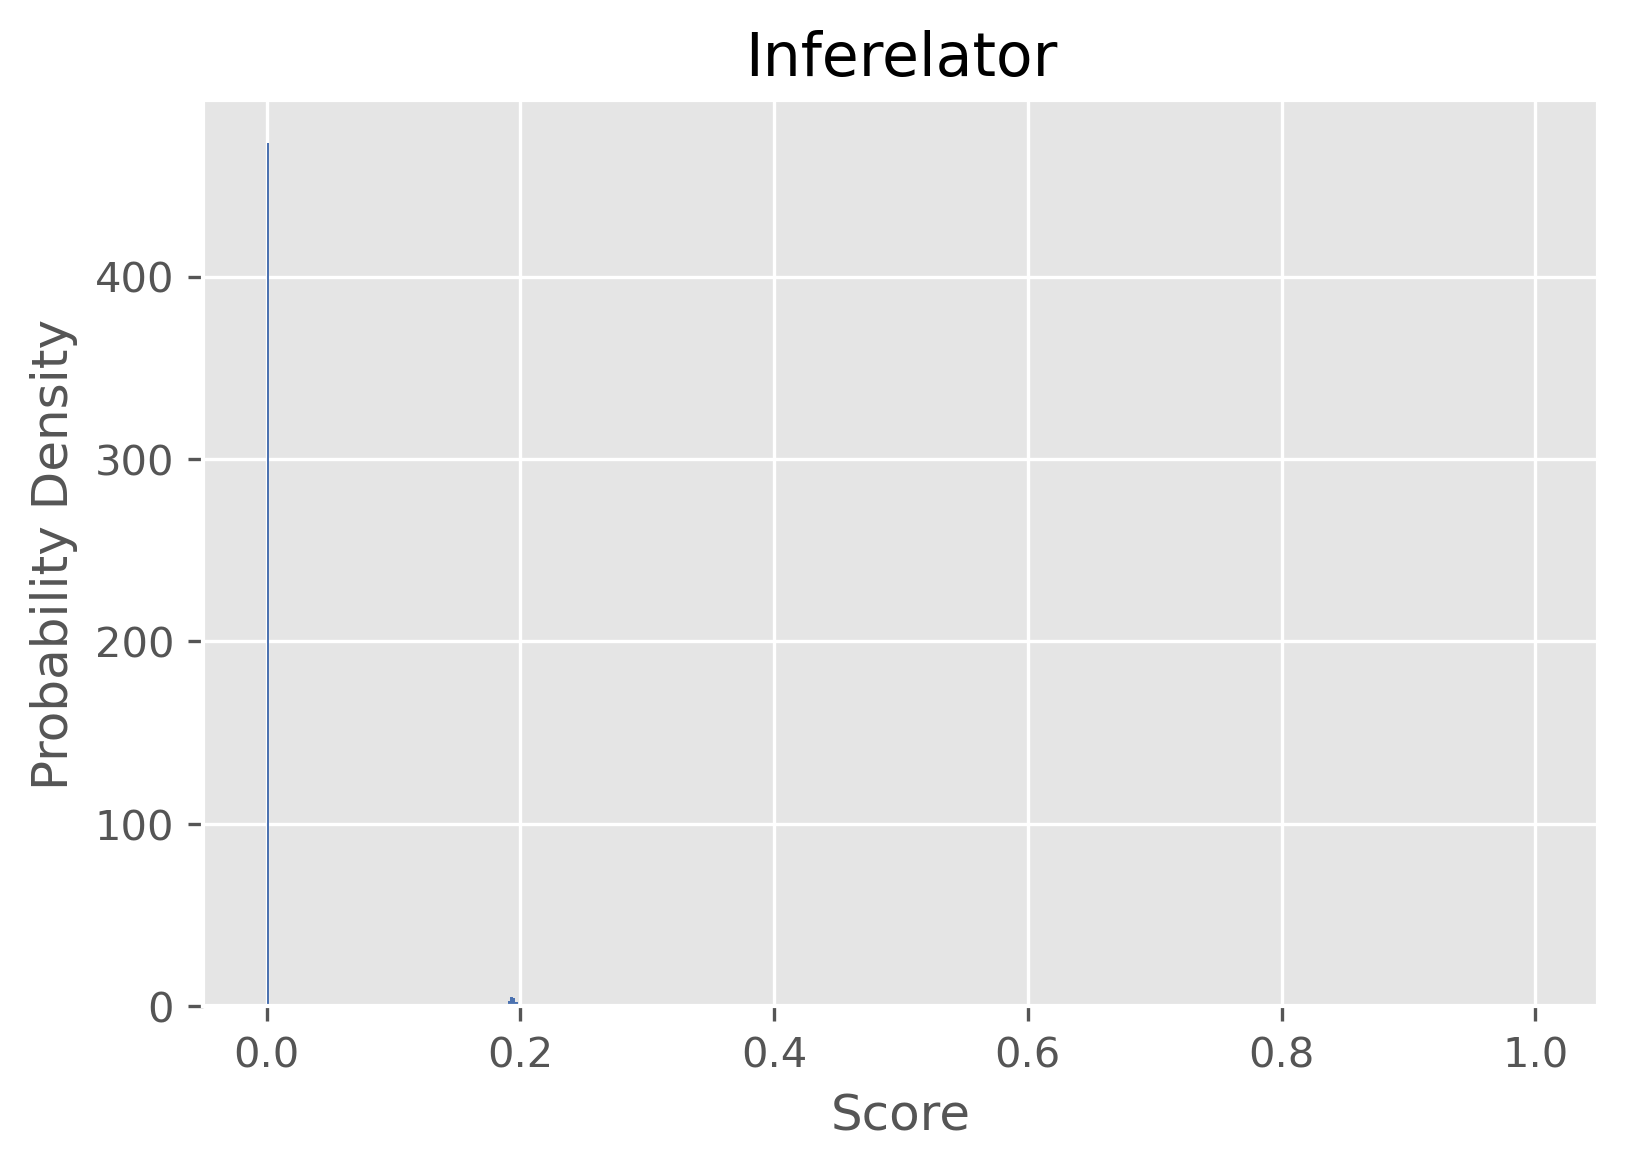

38.77440041460243


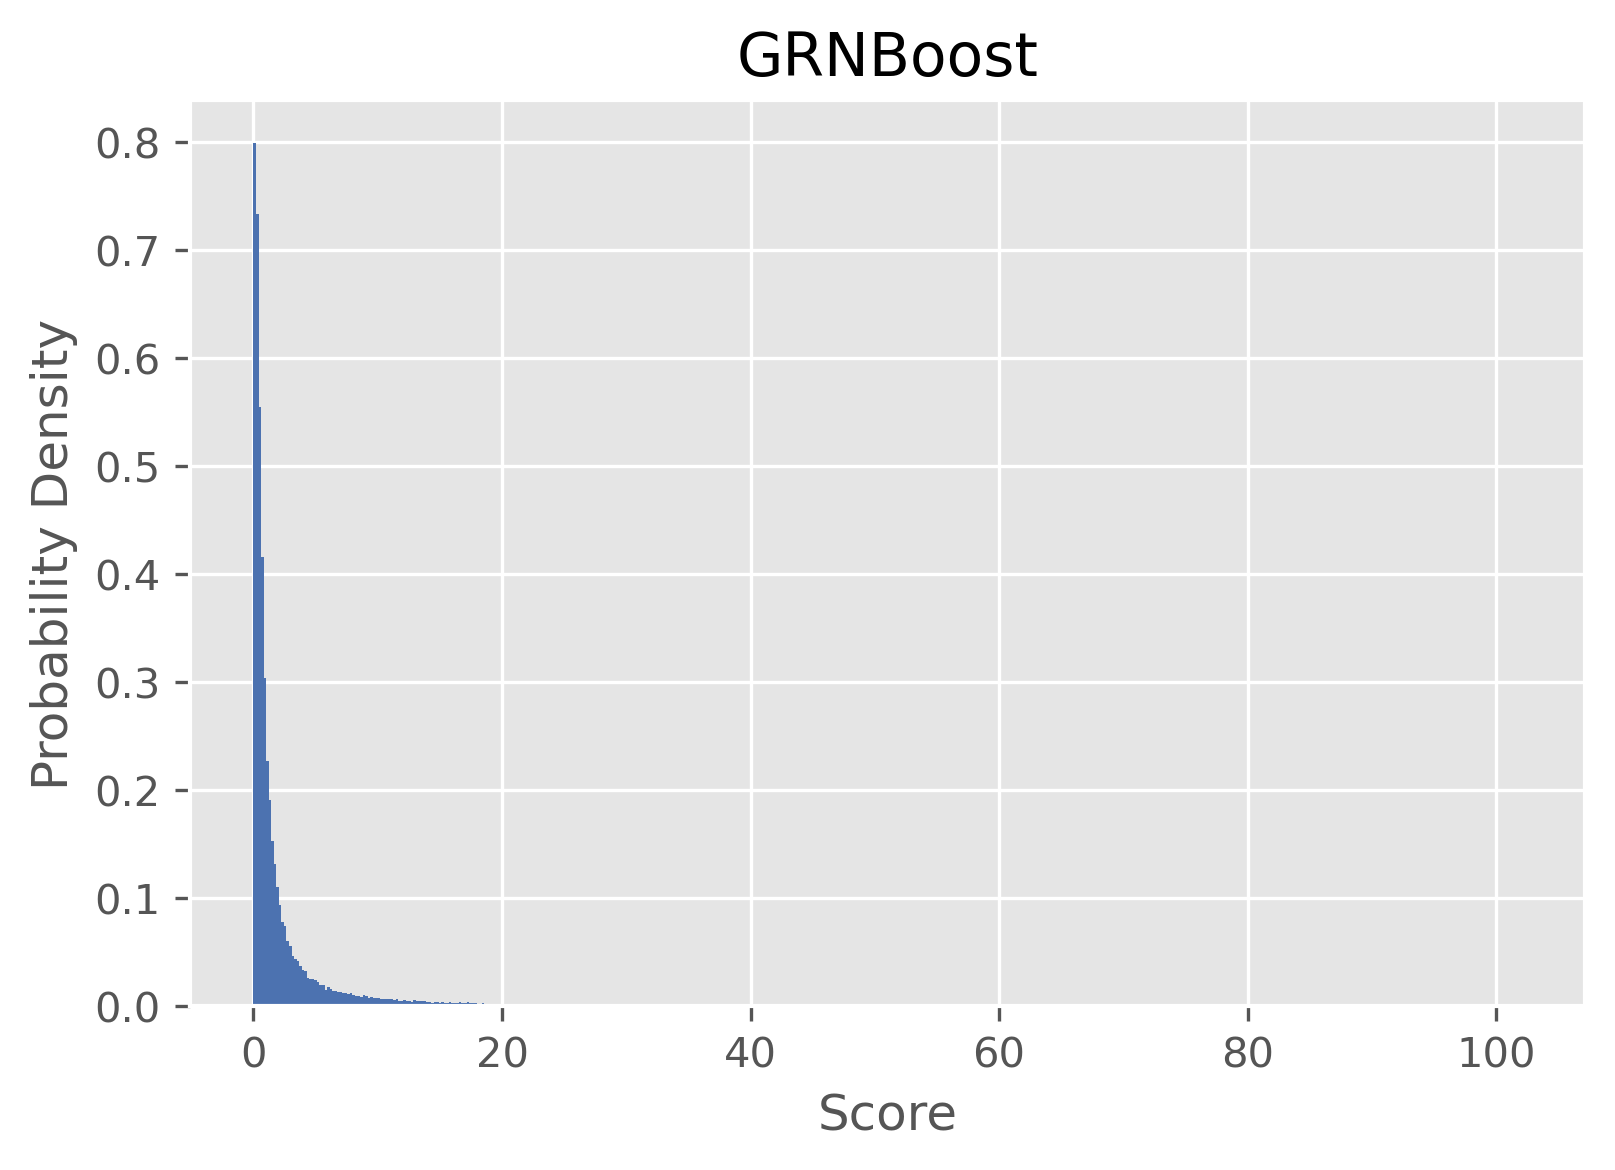

21.0662638238477


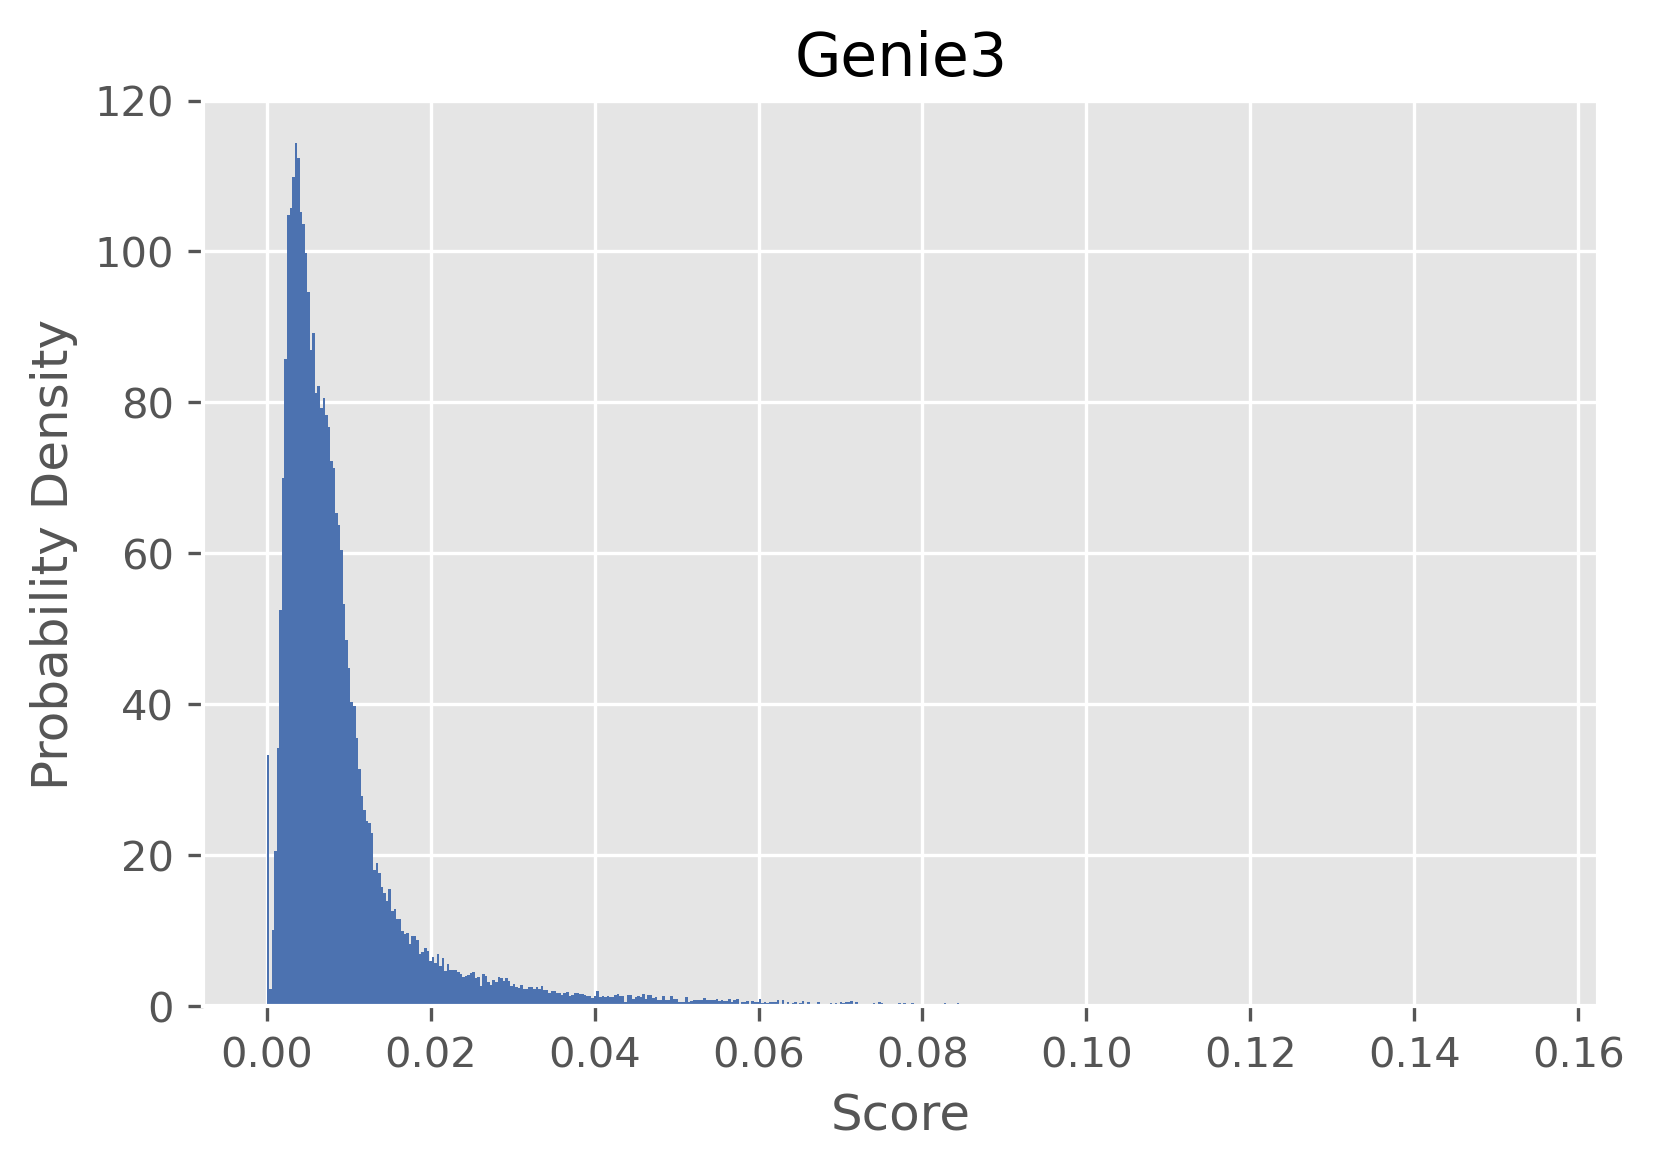

-1.1982141583353814


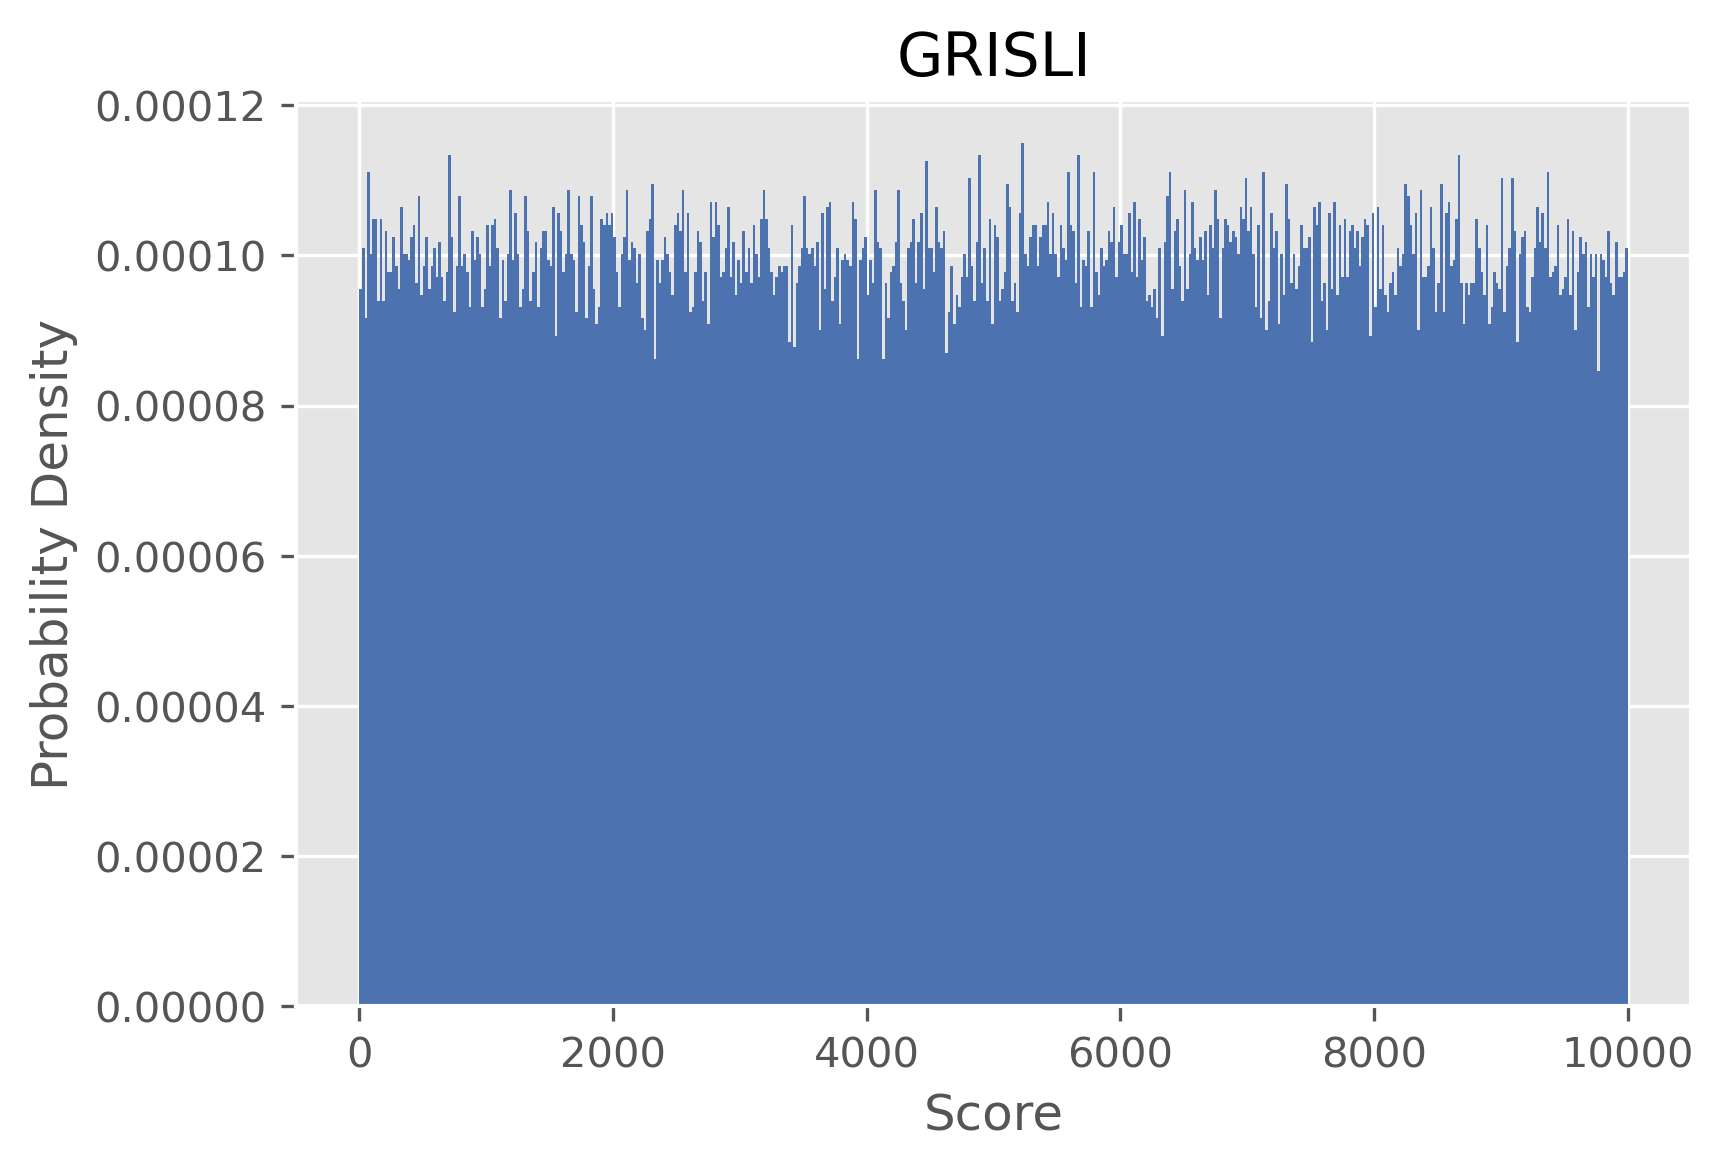

1.2086669180796799


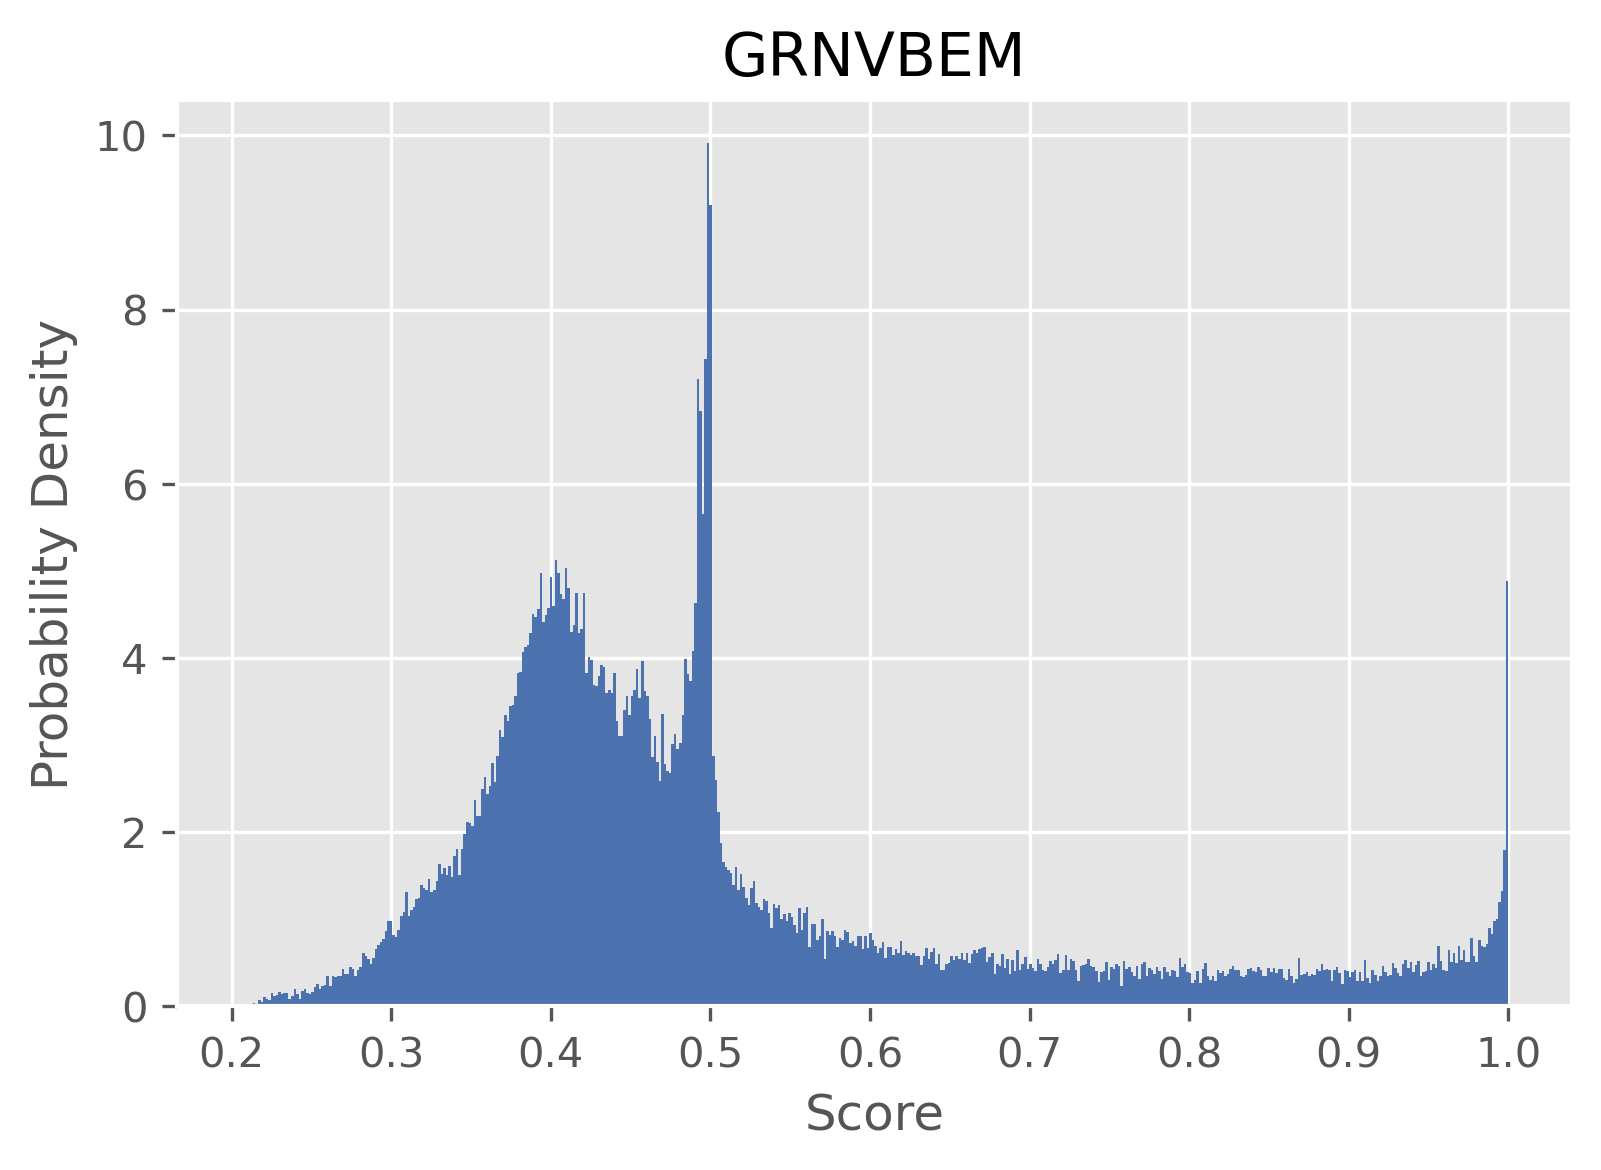

4.896612216899659


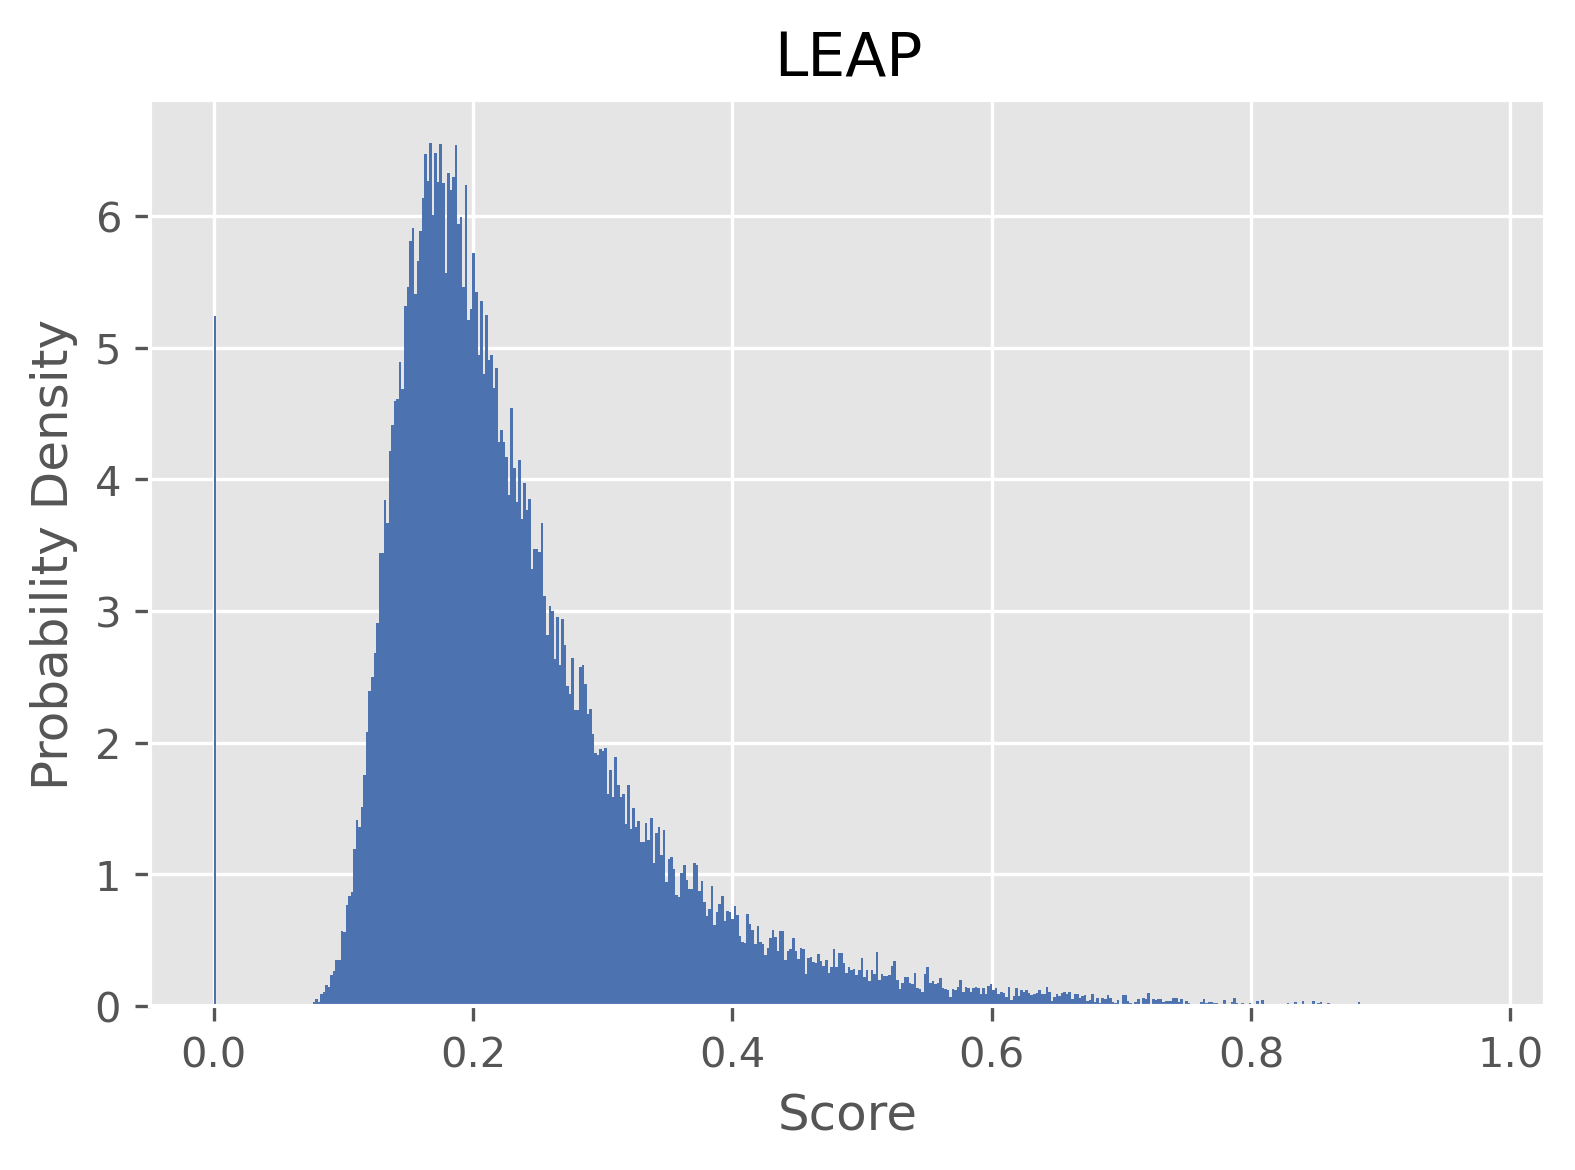

-1.144502737908435


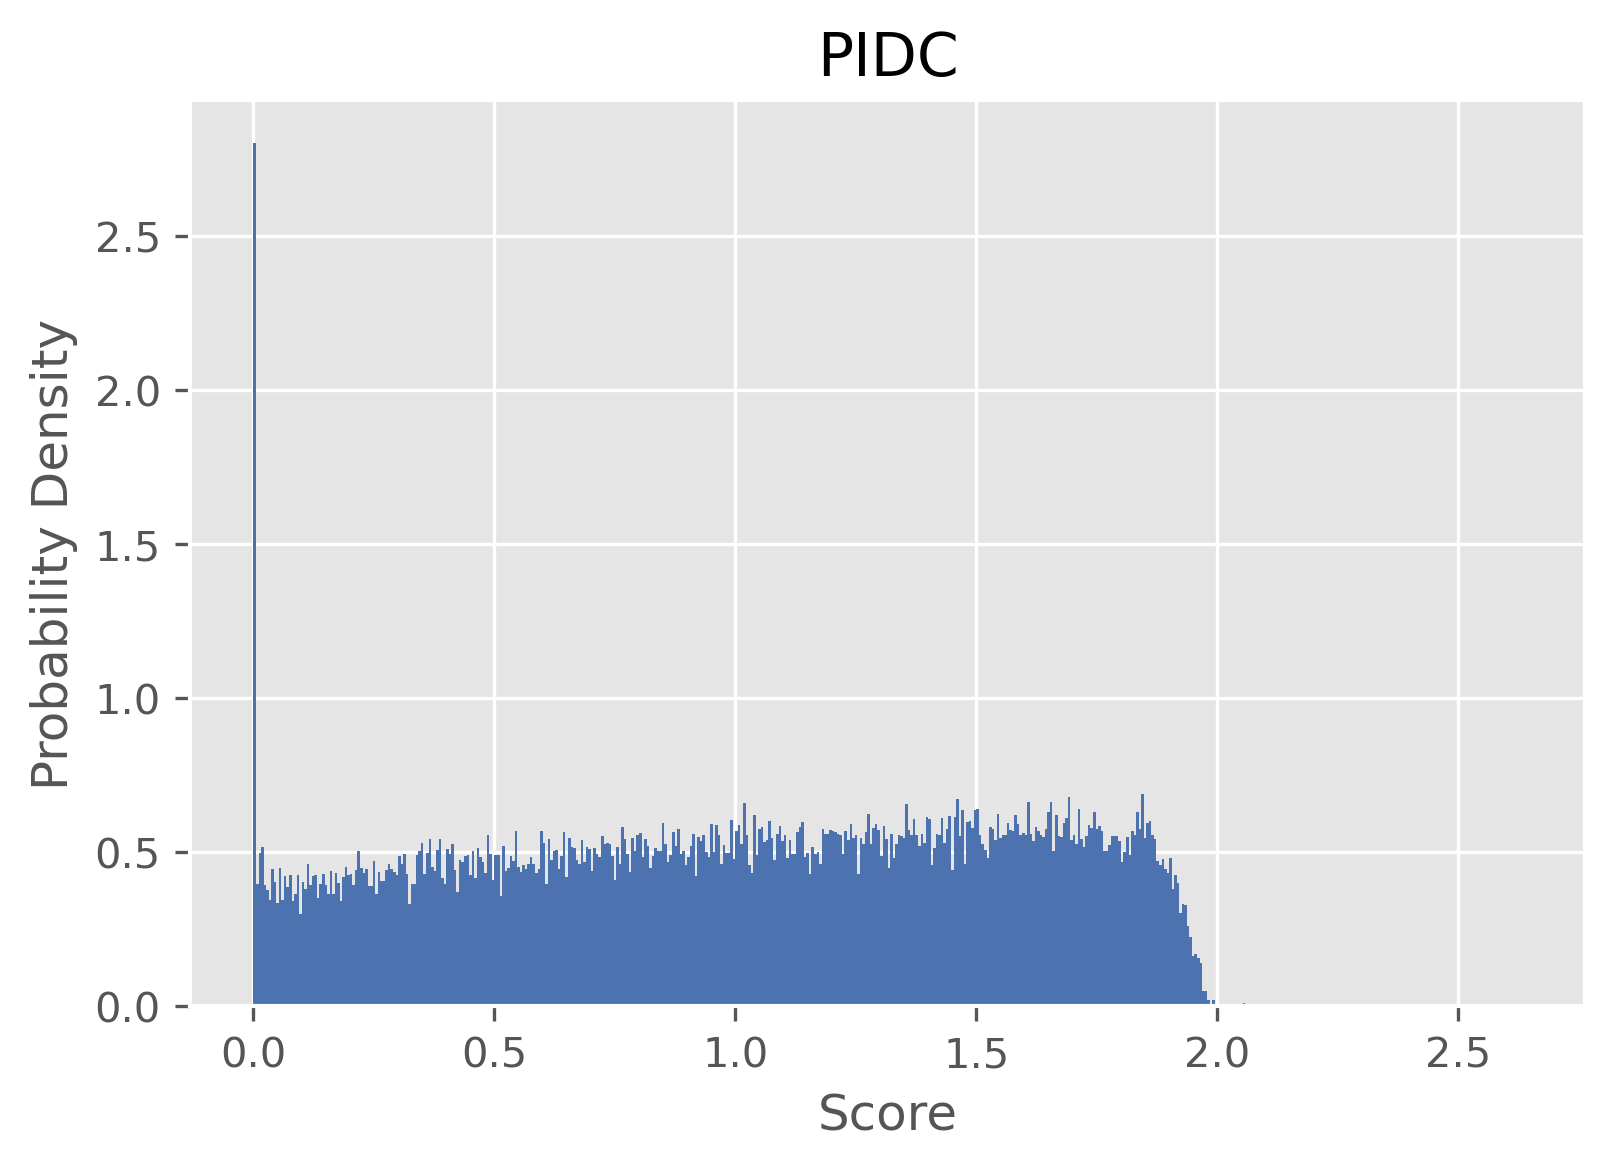

71.77964109586156


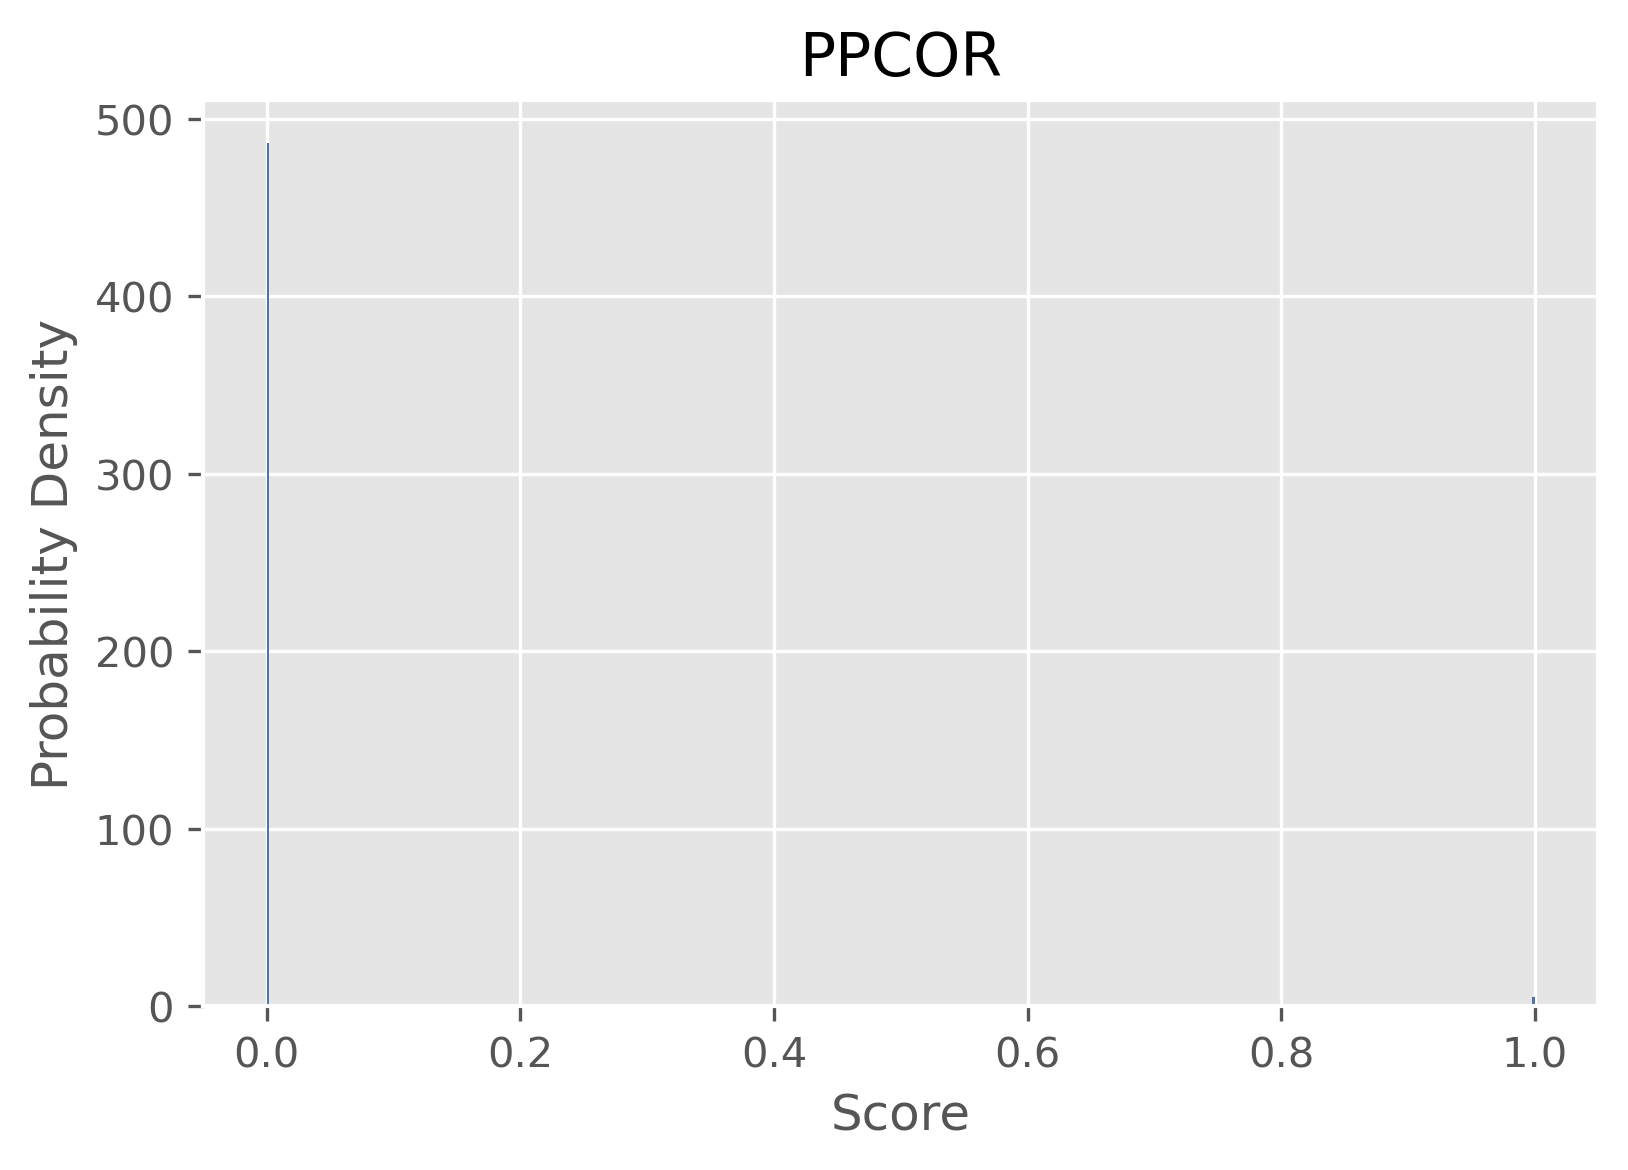

9.110919566696413


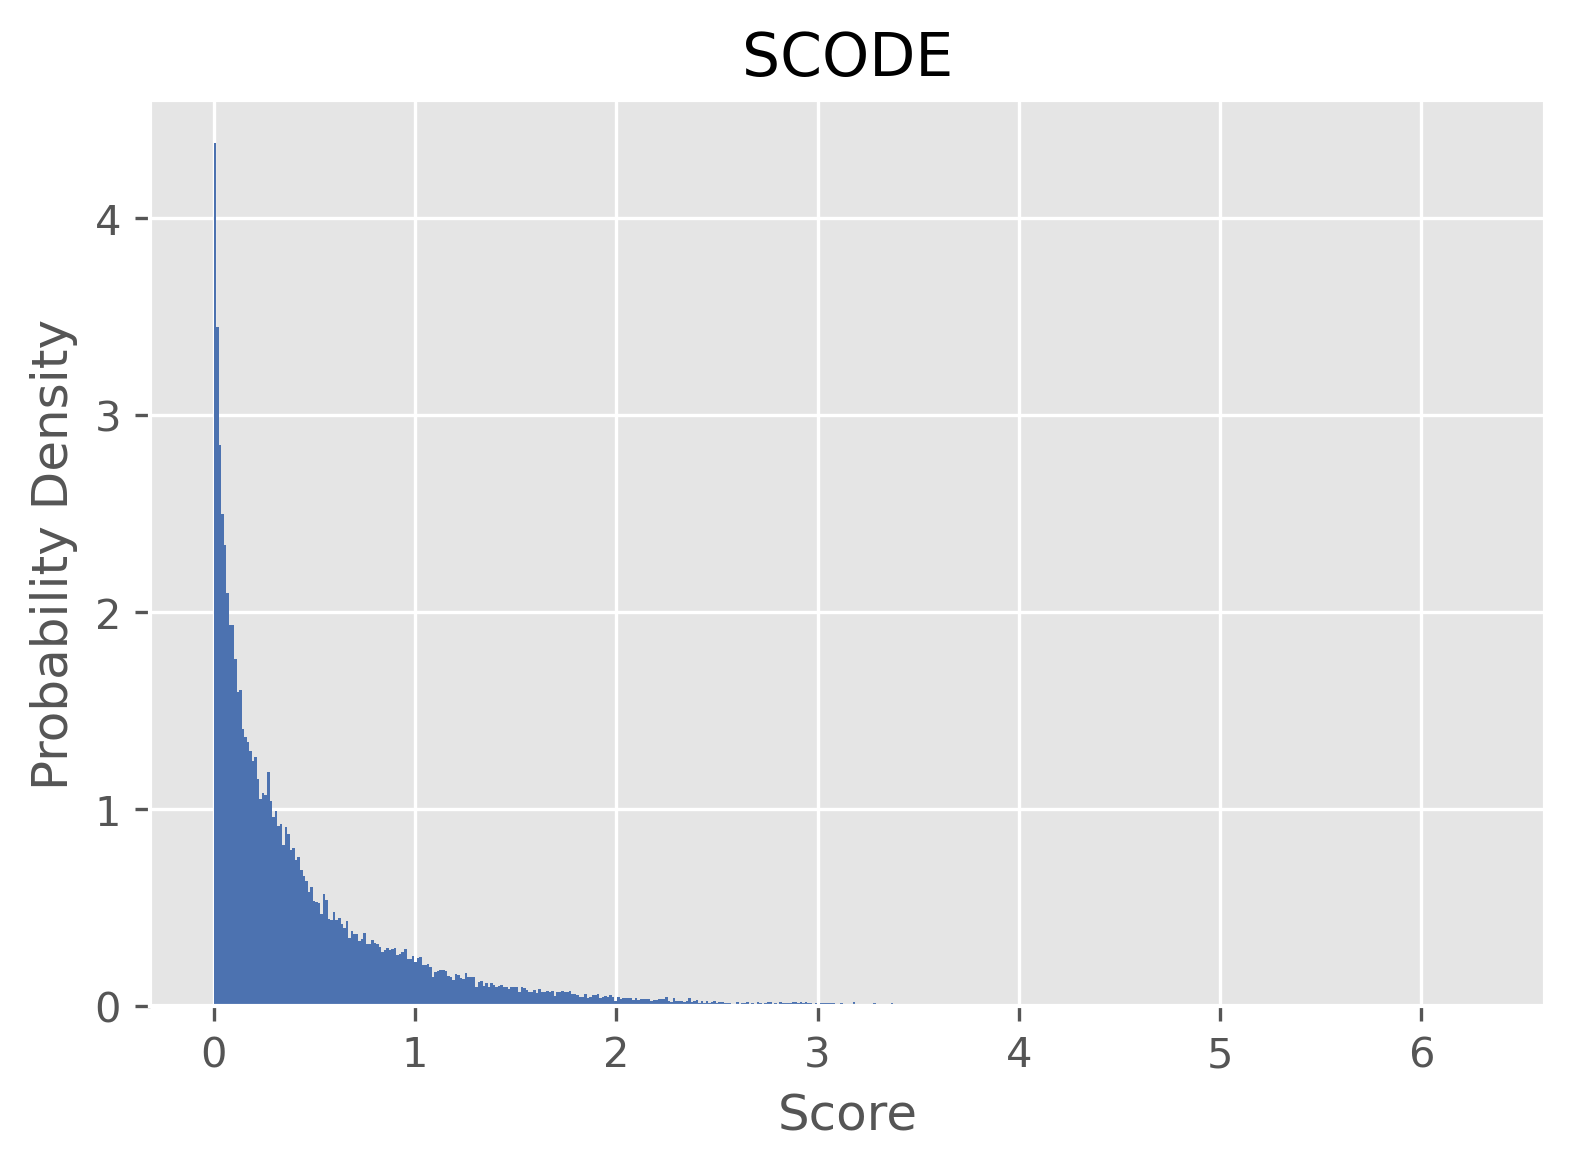

3.9226383033636605


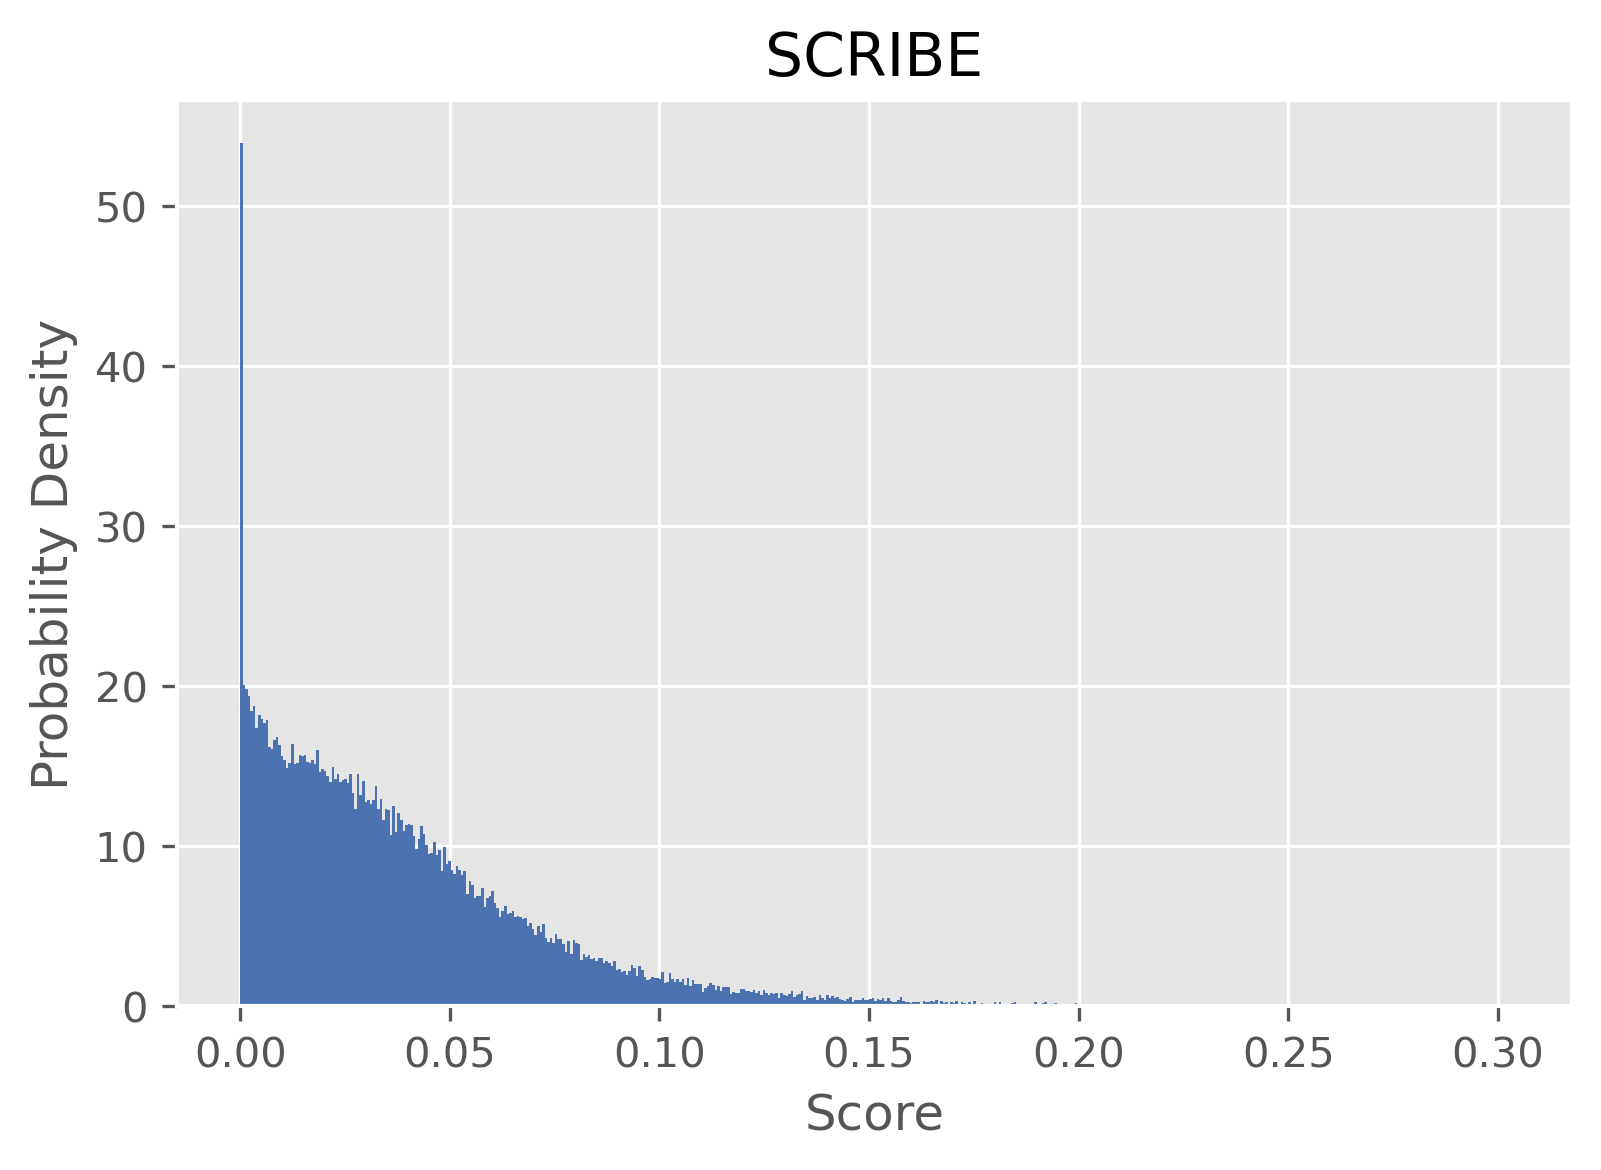

In [14]:
for i, algo in enumerate(algo_names):
    fig, ax = plt.subplots()
    ax.hist(all_train_df[all_train_df['edge_exist']==0][algo], bins=500, density=True, stacked=False)
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title(algo_print_names[i])
    # save_path = './pde_hist/' + algo_print_names[i] + '.png'
    print(kurtosis(all_train_df[all_train_df['edge_exist']==0][algo]))
    plt.show()


184.01672122955353


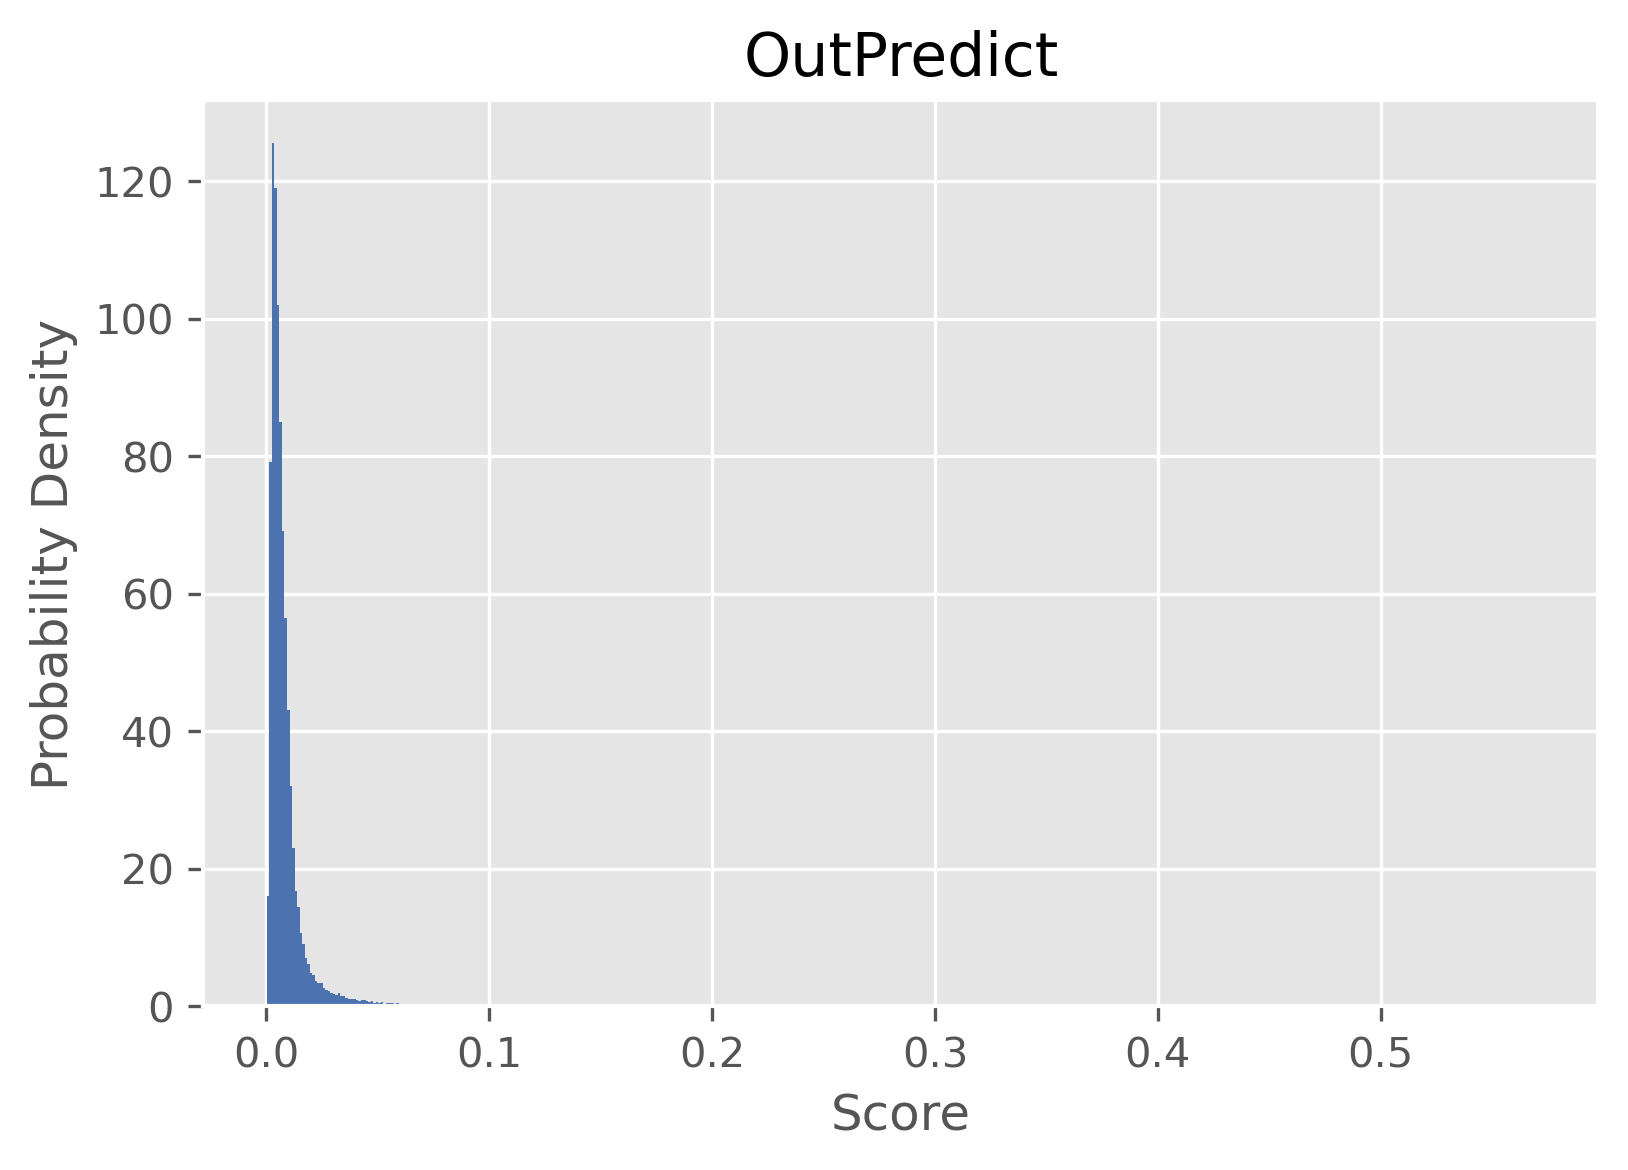

44.630230346129096


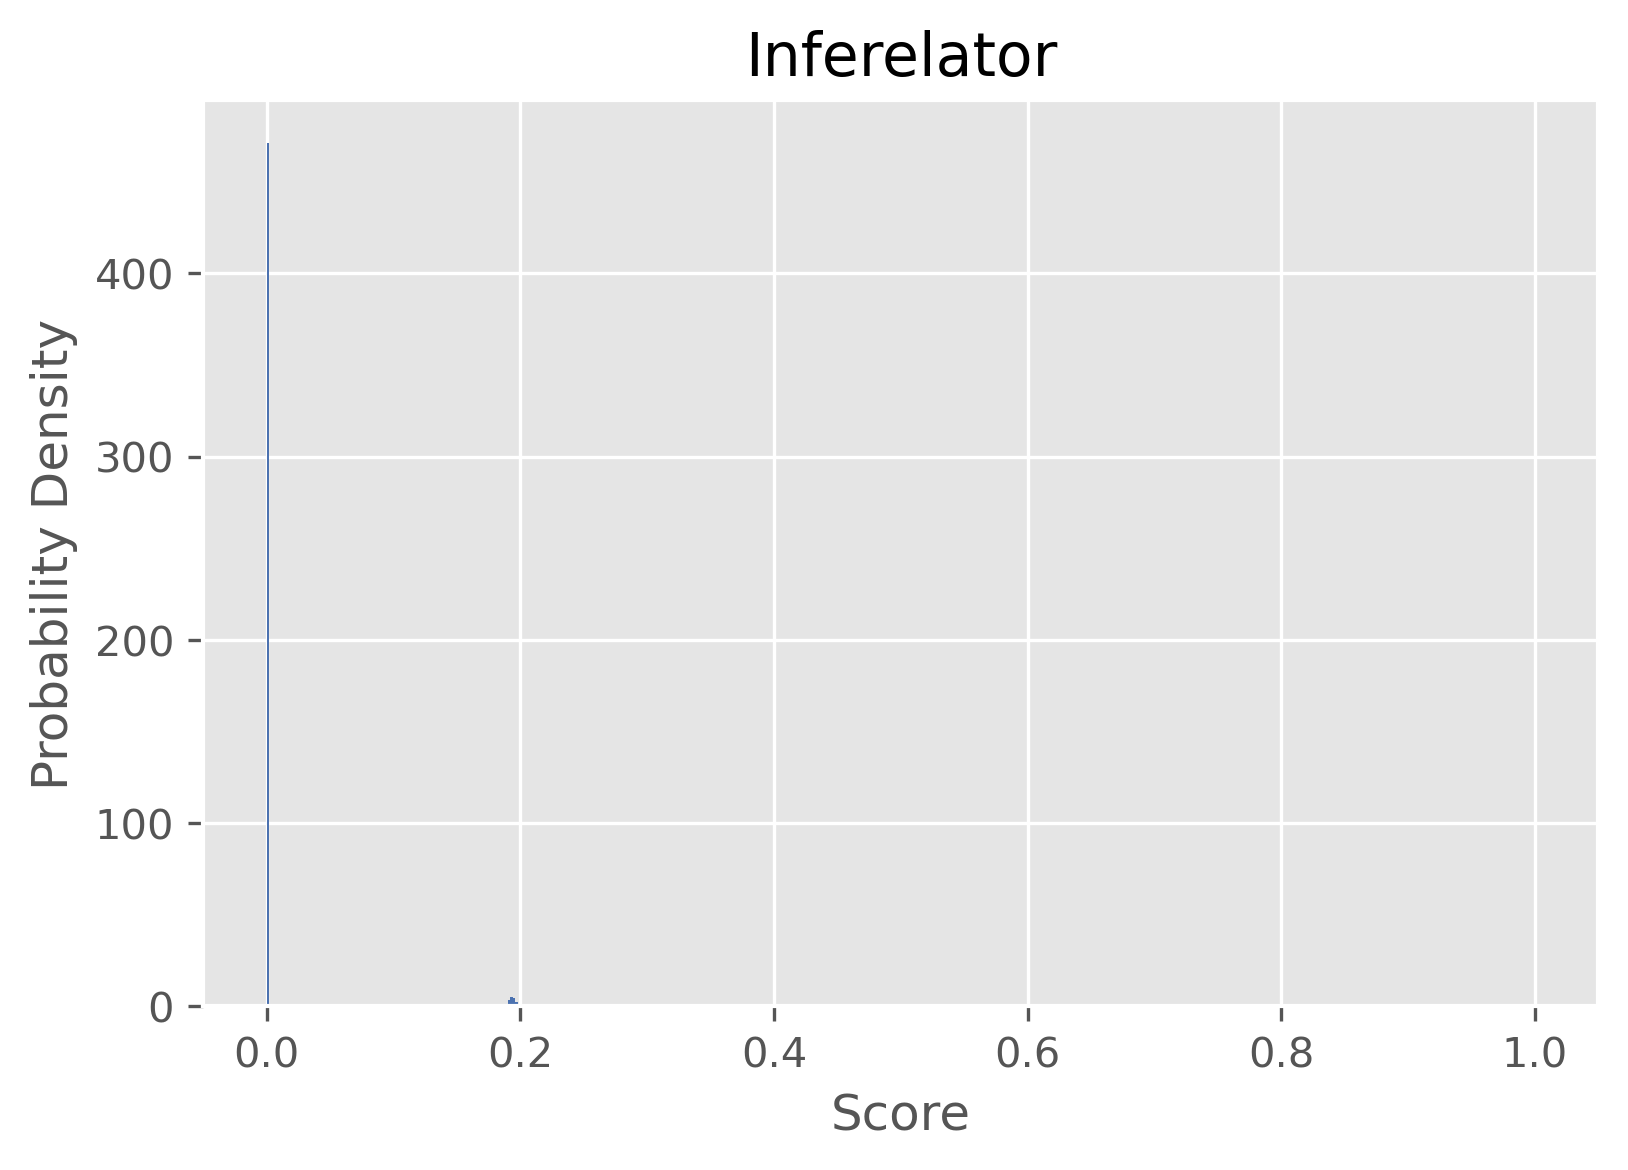

37.83566201270685


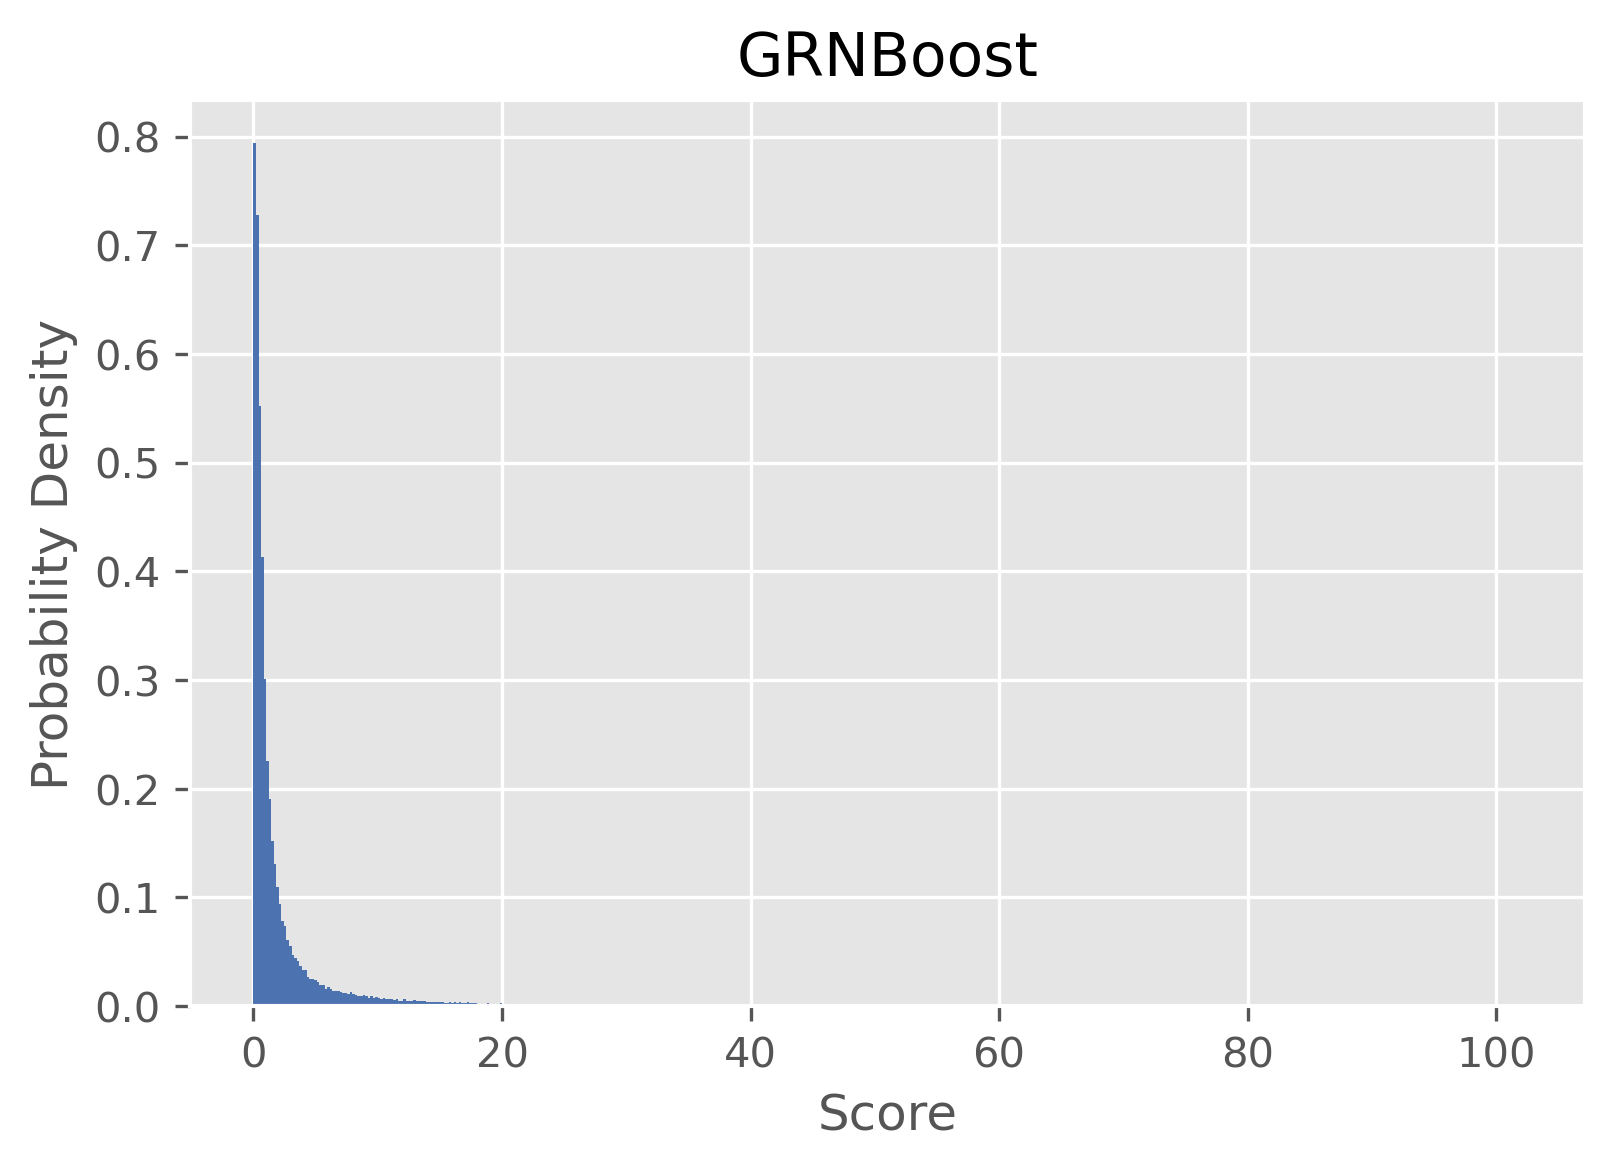

20.58731093654869


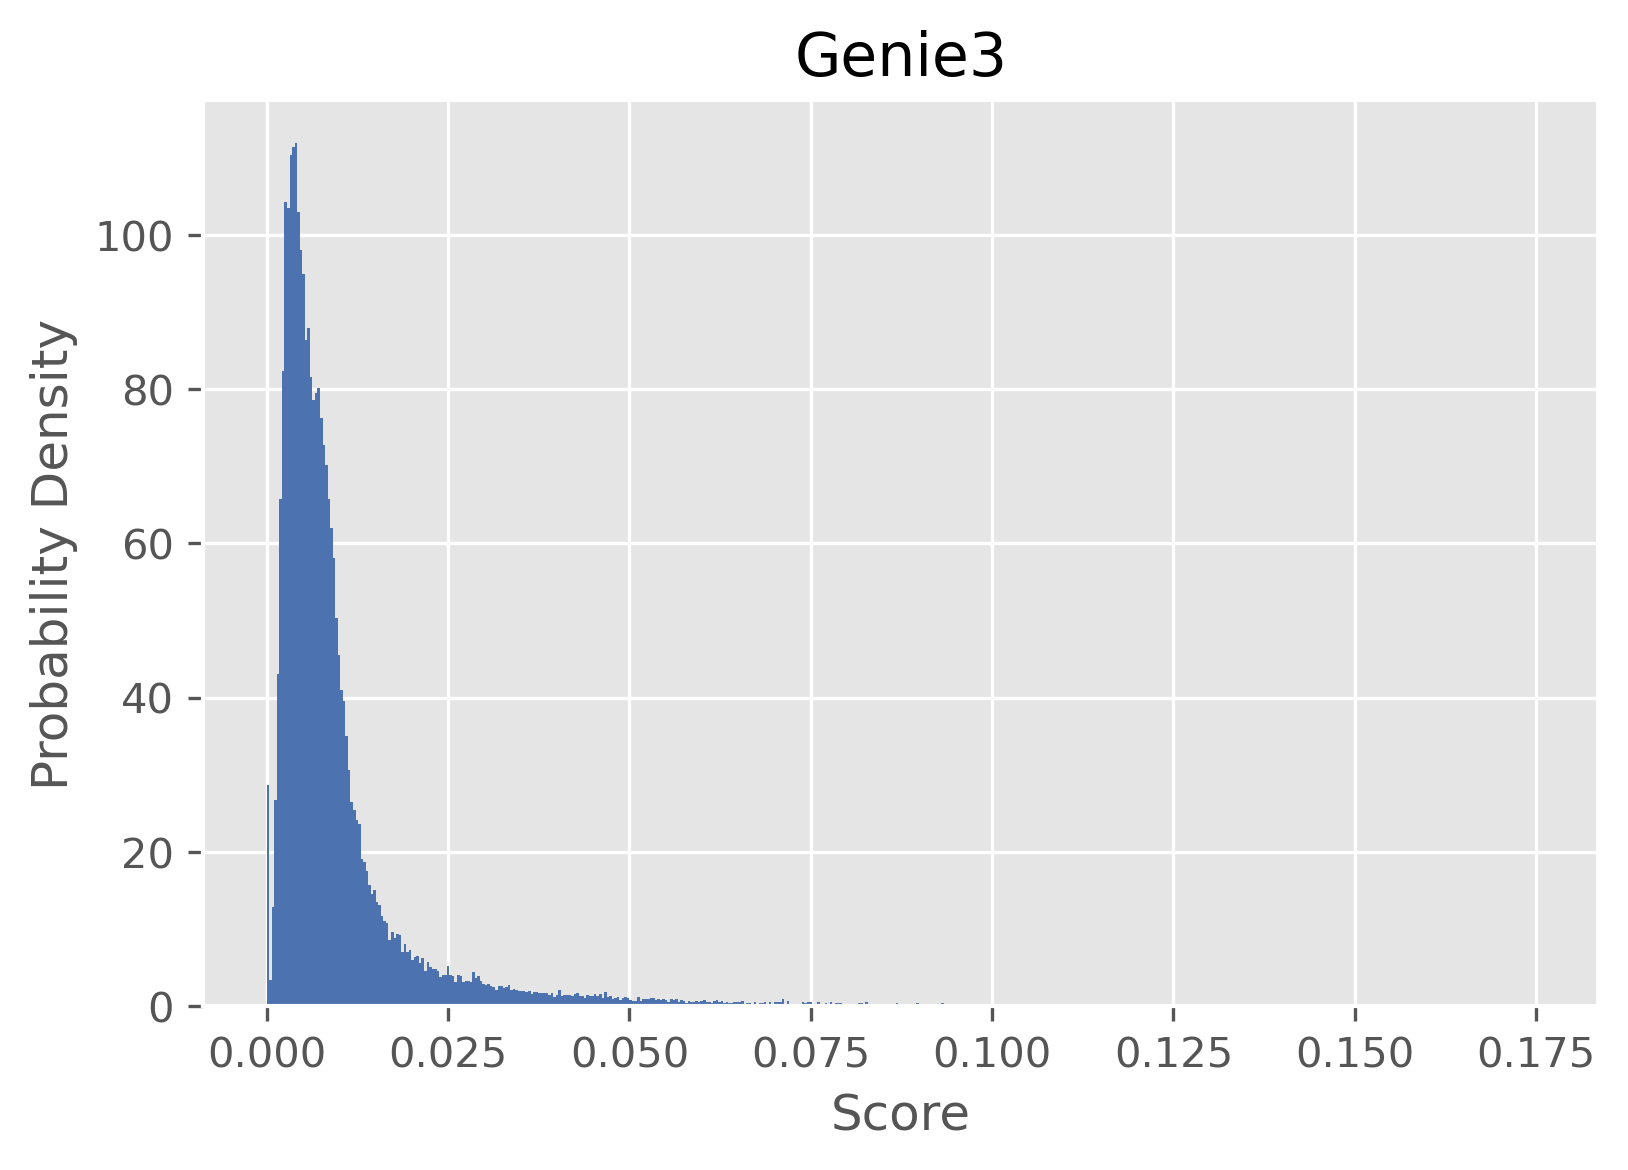

-1.2004201733798874


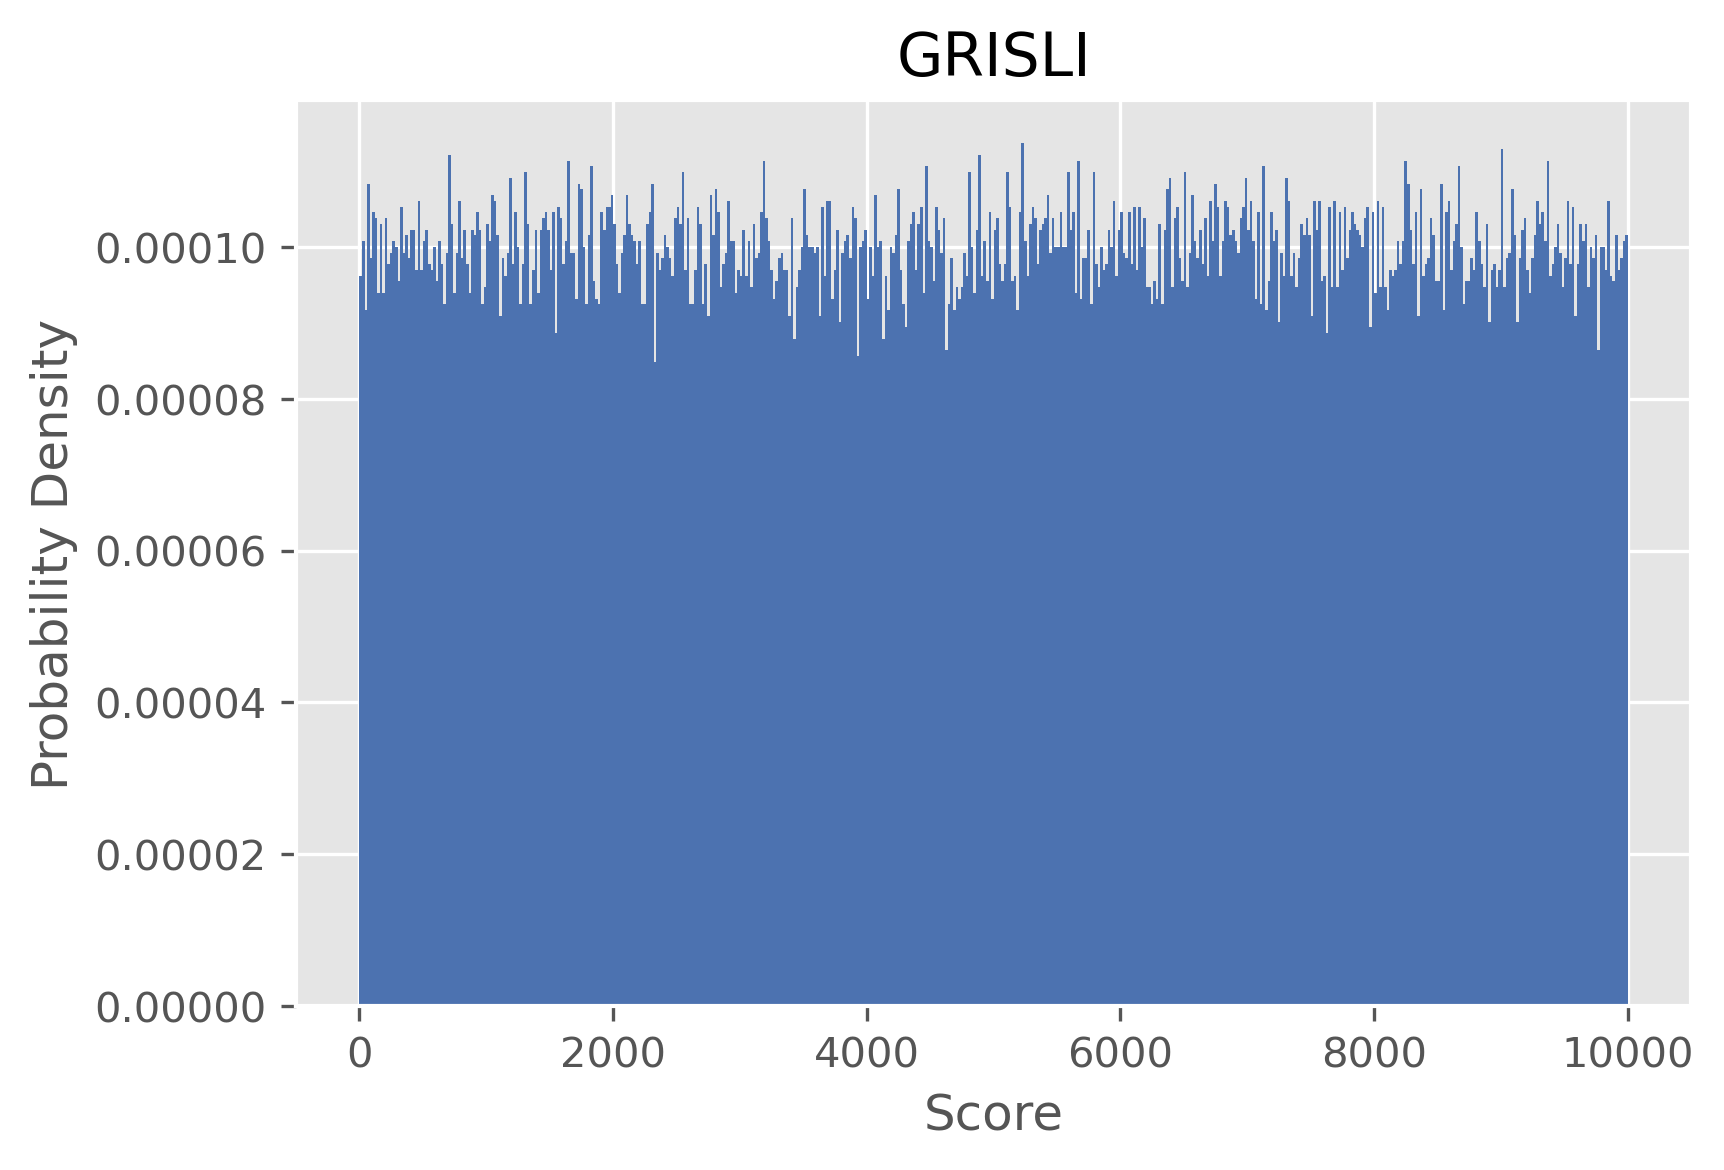

1.1988003255575697


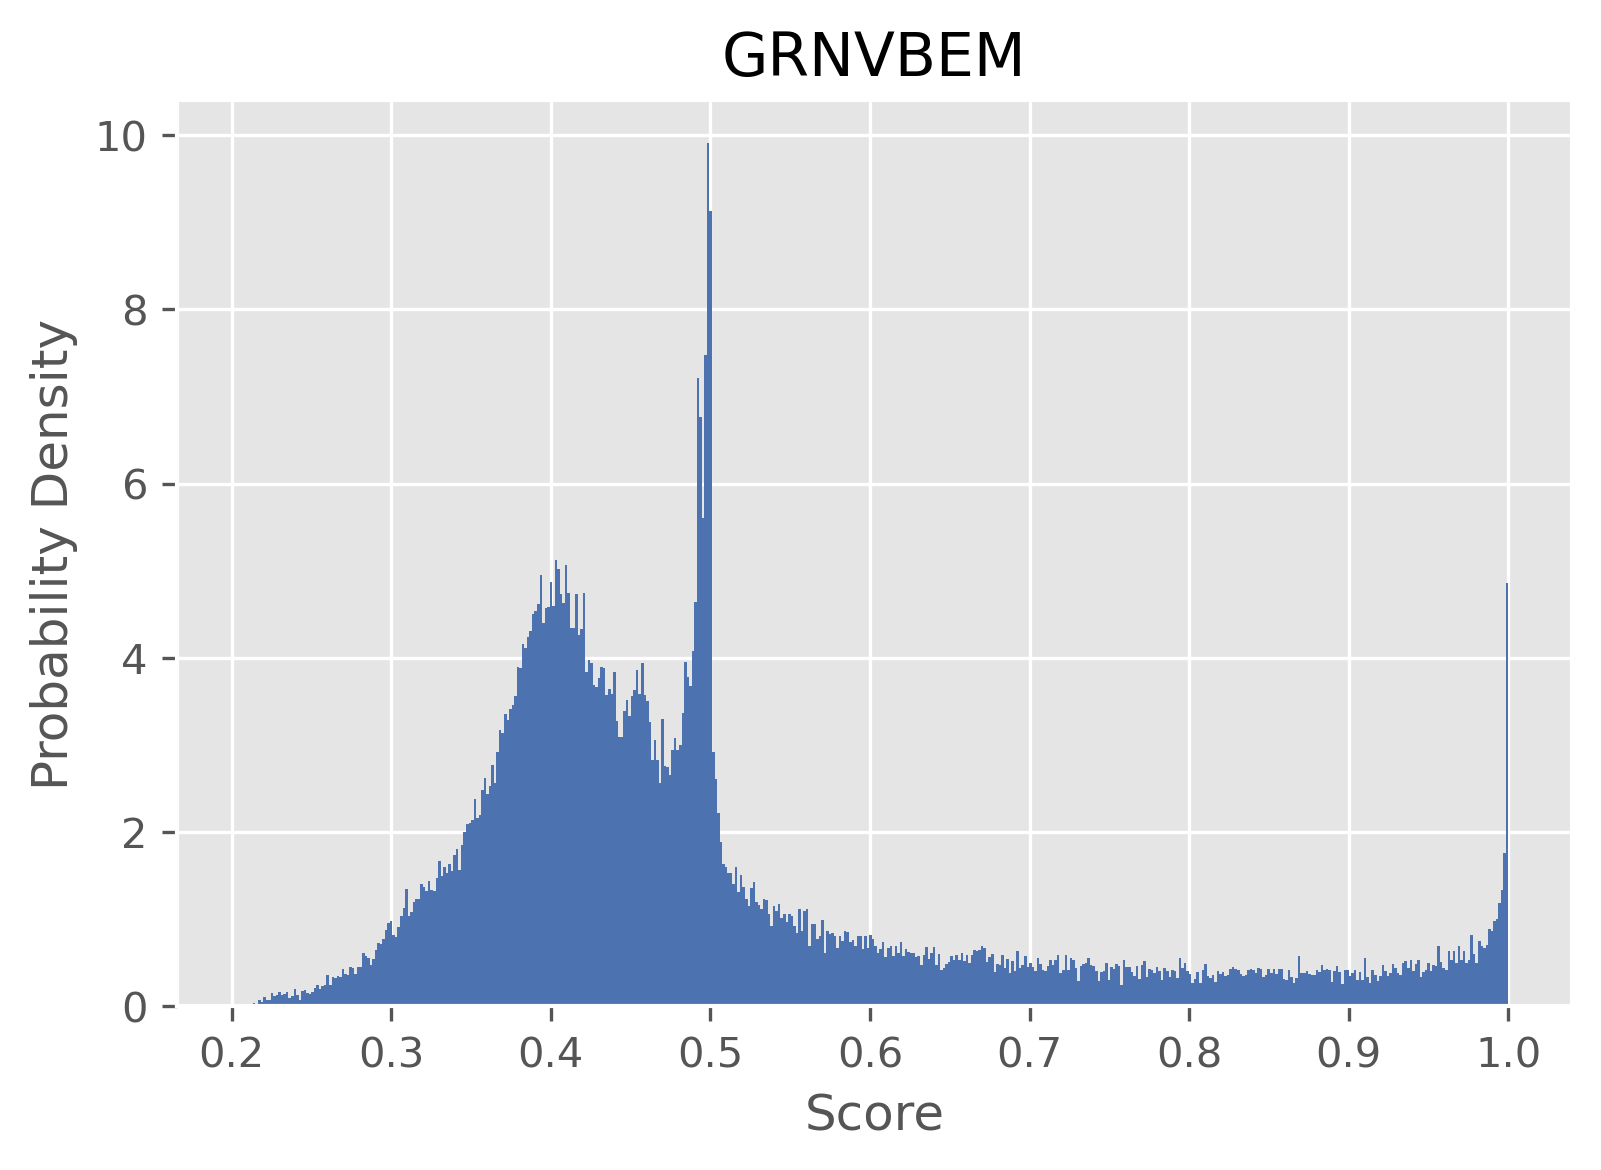

4.887340748202929


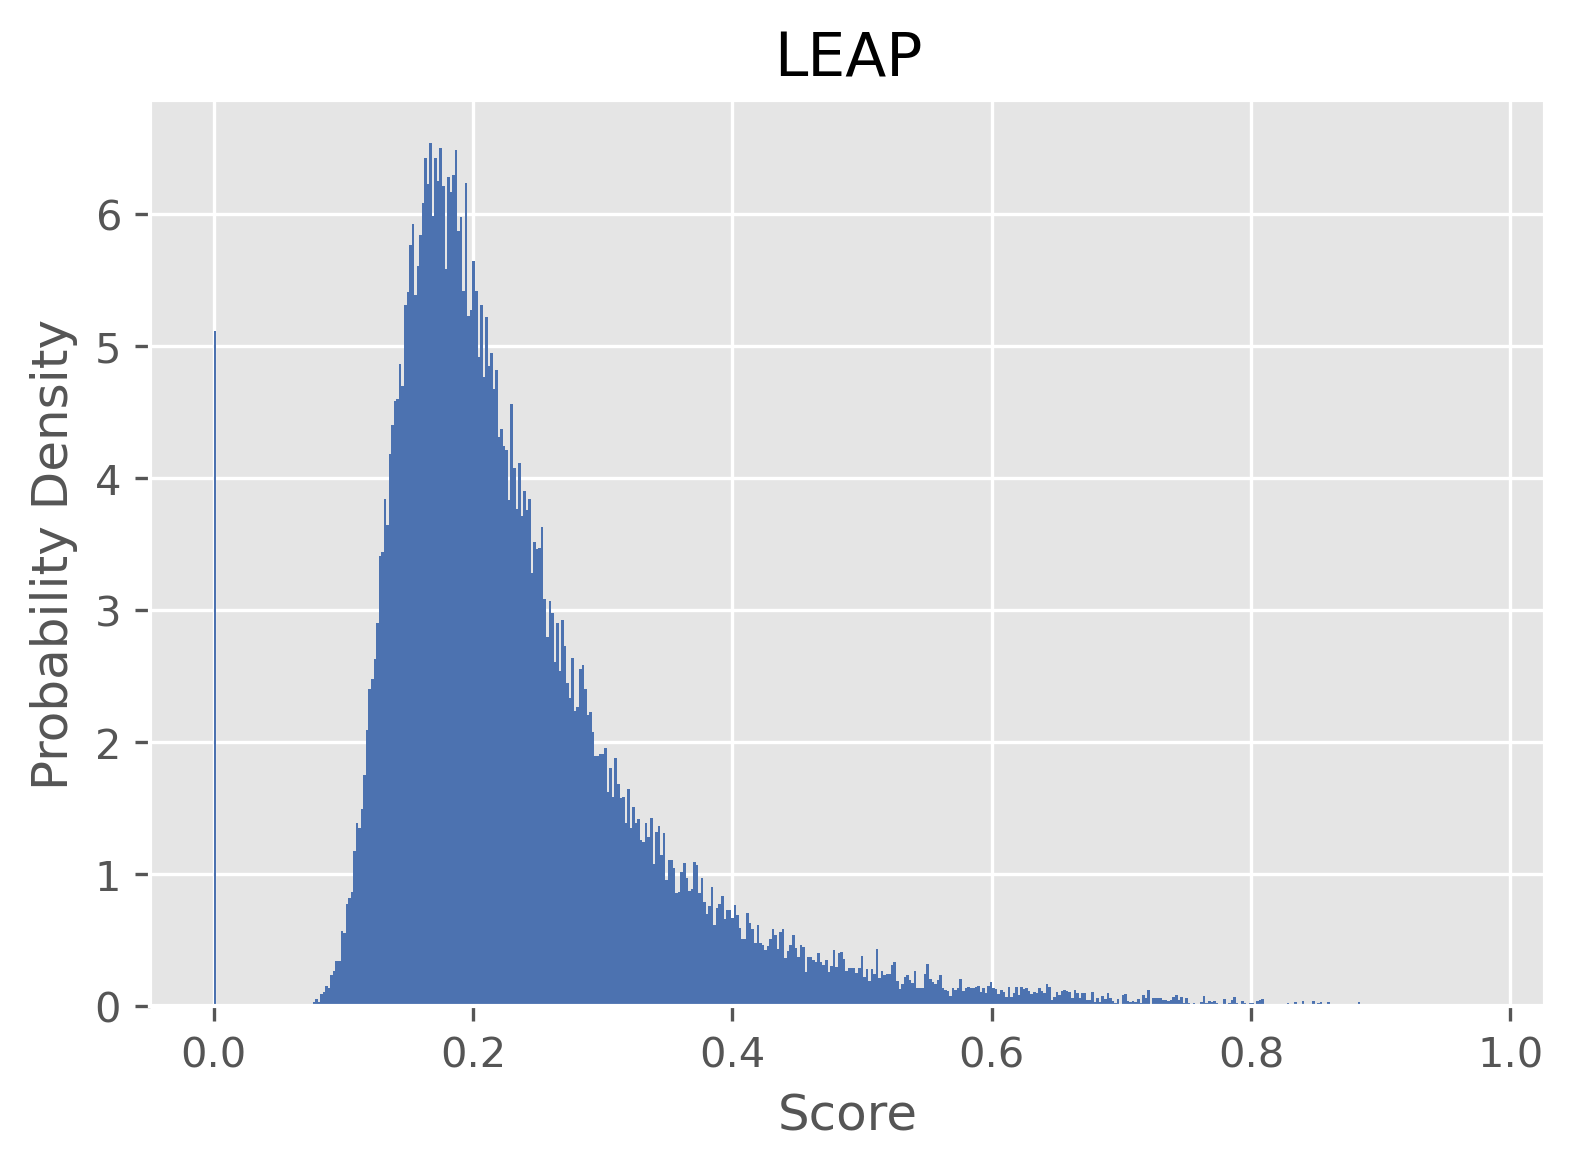

-1.1464643919757134


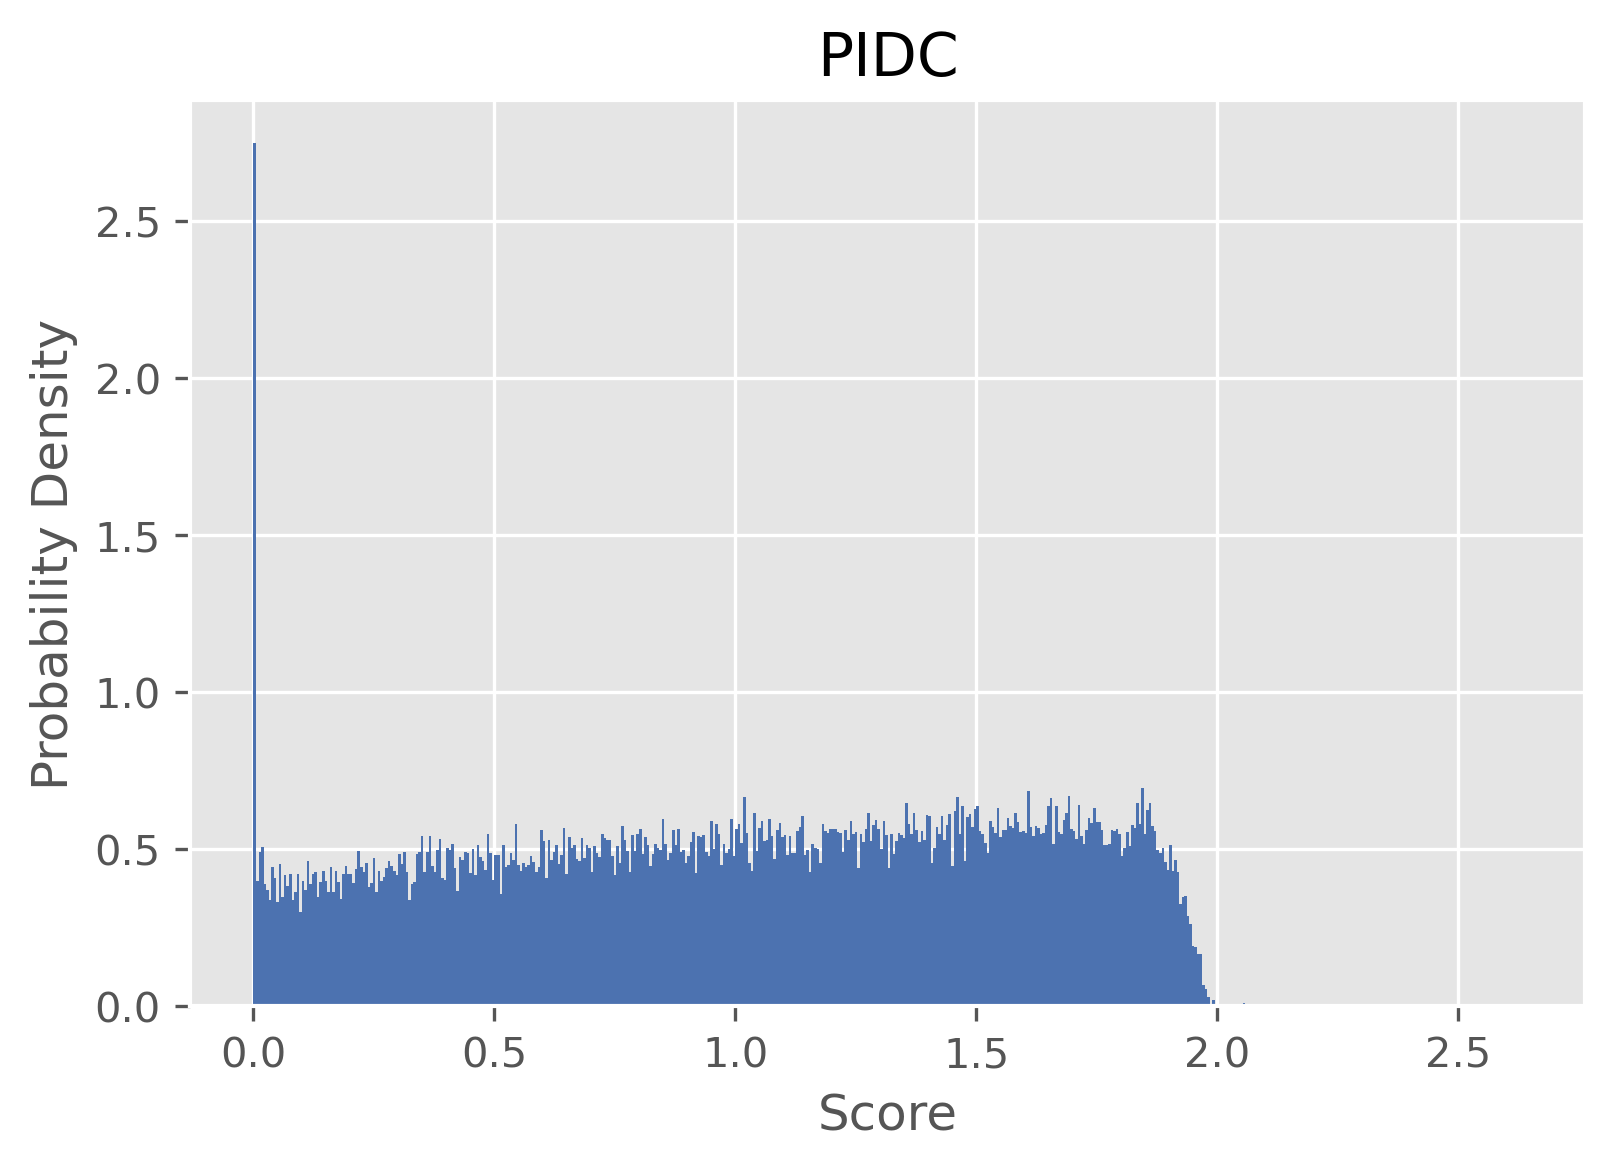

72.49301853616429


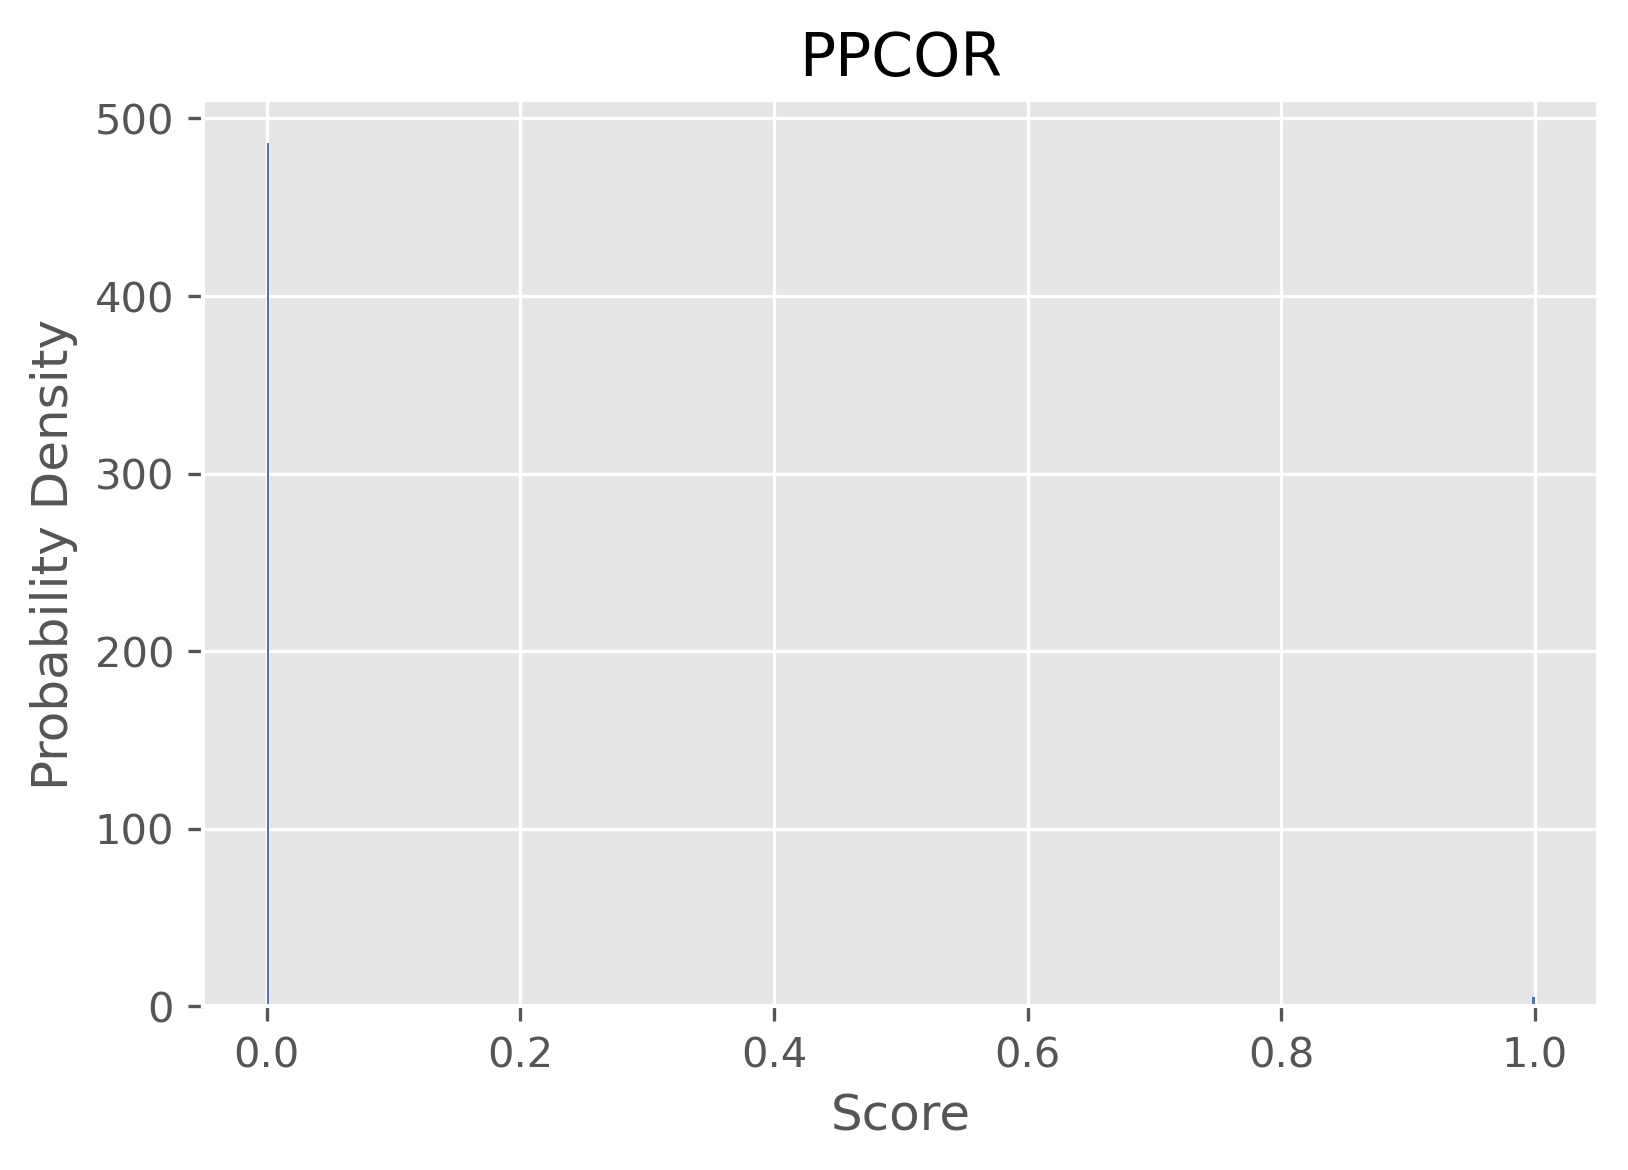

9.120977652617299


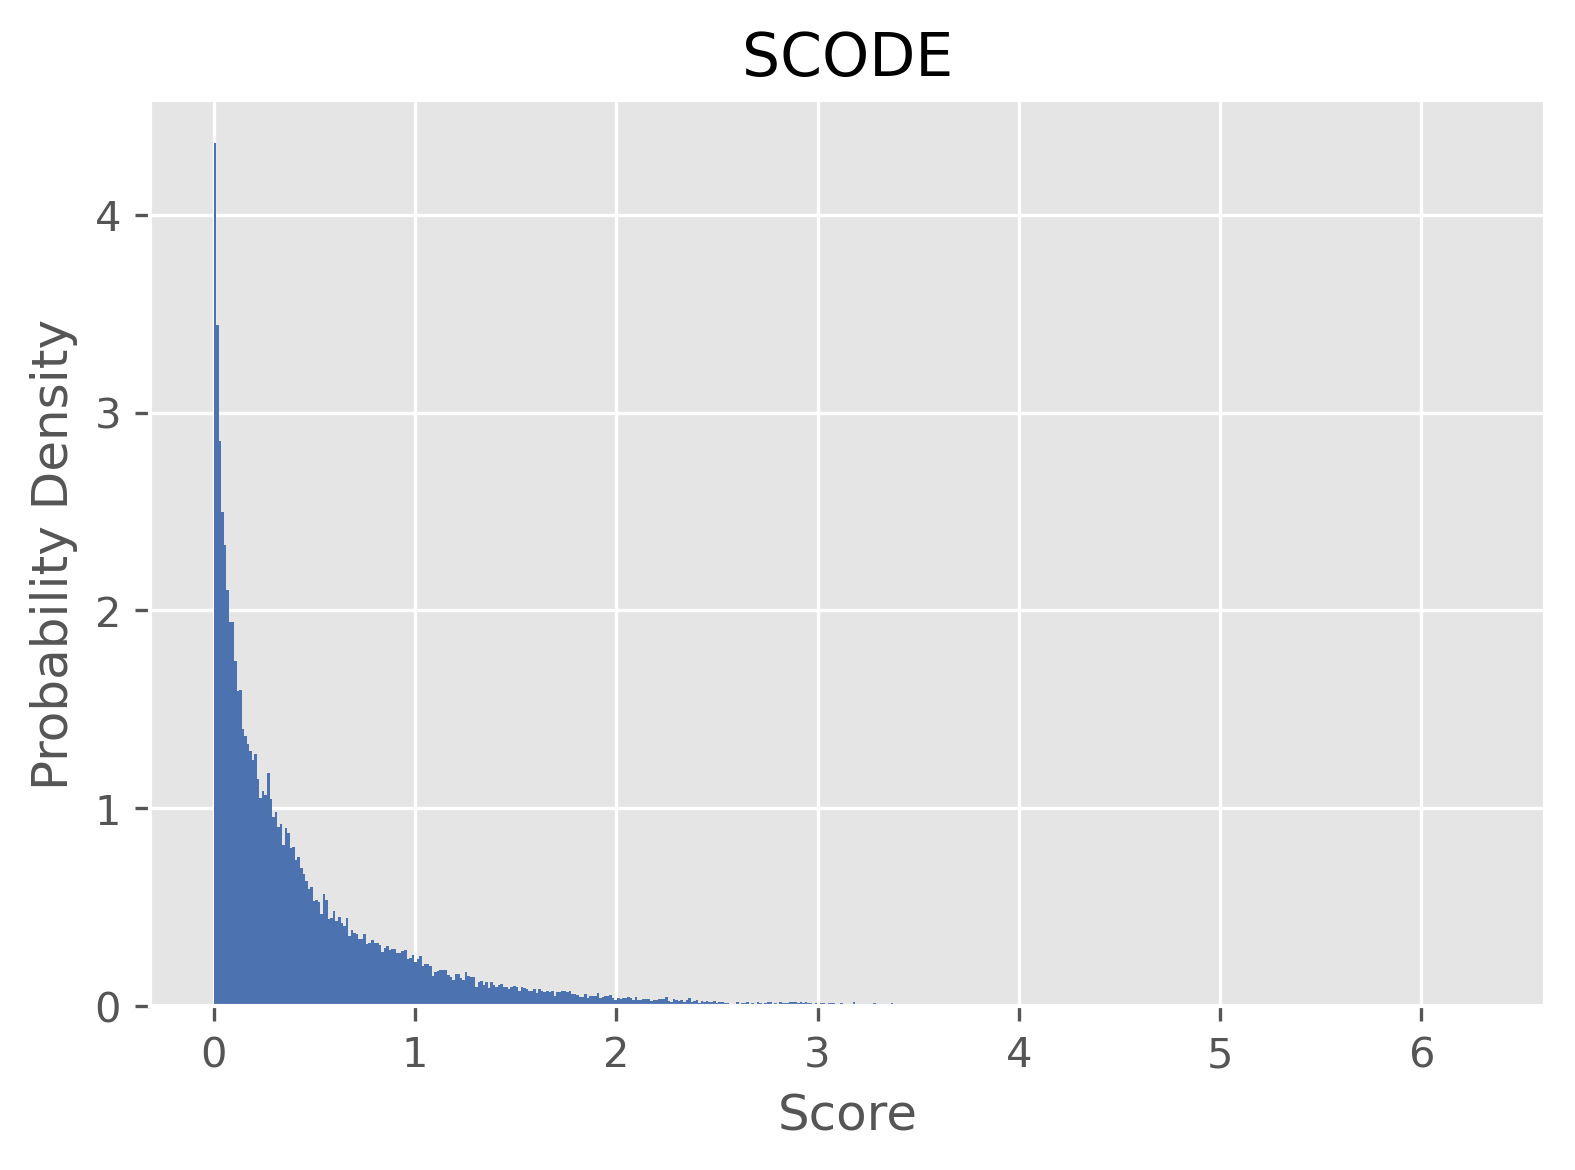

4.036871996783433


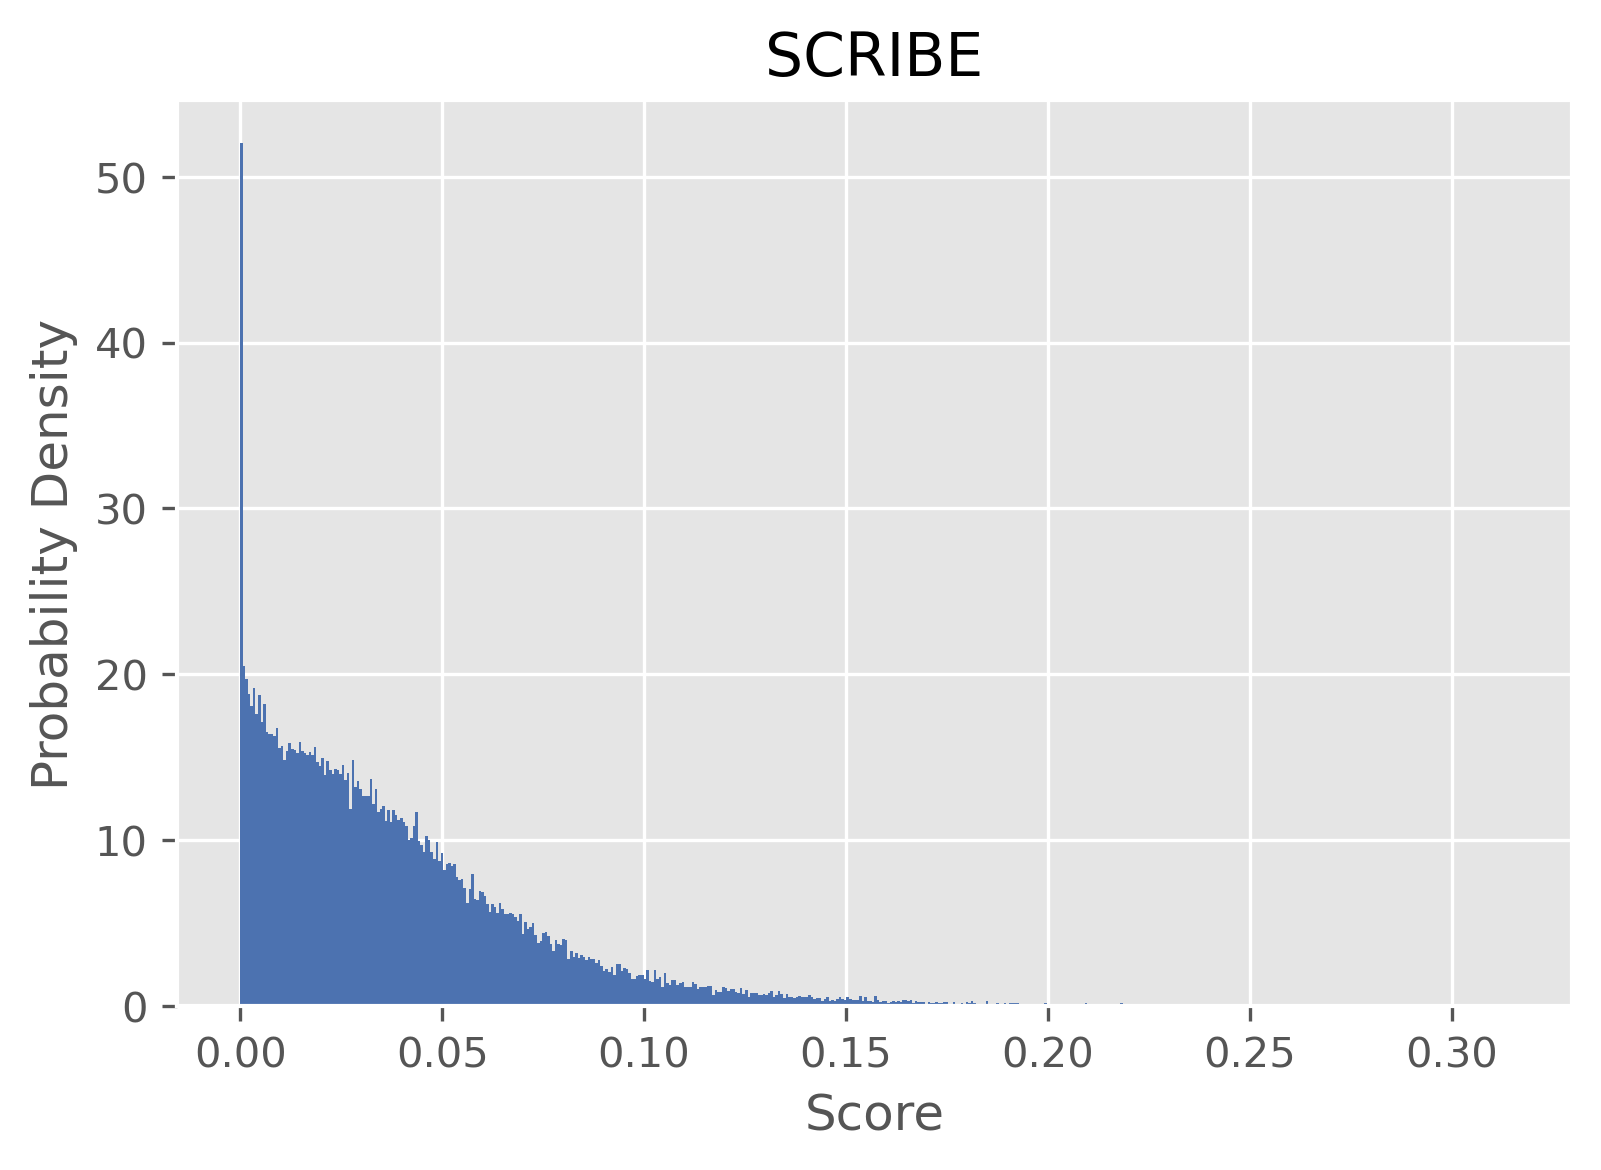

In [8]:
for i, algo in enumerate(algo_names):
    fig, ax = plt.subplots()
    ax.hist(all_train_df[algo], bins=500, density=True, stacked=False)
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title(algo_print_names[i])
    # save_path = './pde_hist/' + algo_print_names[i] + '.png'
    print(kurtosis(all_train_df[algo]))
    plt.show()


In [16]:
# algo_print_names = ['OutPredict', 'Inferelator', 'GRNBoost', 'Genie3', 'GRISLI', 'GRNVBEM', 'LEAP',  'PIDC', 'PPCOR', 'SCODE', 'SCRIBE', 'SINCERITIES']
algo_print_names = ['OutPredict', 'Inferelator', 'GRNBoost', 'Genie3', 'GRISLI', 'LEAP',  'PIDC', 'PPCOR', 'SCODE', 'SCRIBE']
# algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'grnvbem', 'leap',  'pidc', 'ppcor', 'scode', 'scribe', 'sincerities']
algo_names = ['op', 'inf', 'grnboost', 'genie3', 'grisli', 'leap',  'pidc', 'ppcor', 'scode', 'scribe']

In [17]:
ensemble_models = [LogisticRegression(random_state=42, n_jobs=-1), GaussianNB(), SGDClassifier(loss='log', random_state=42, n_jobs=-1), 
SVC(random_state=42, probability=True), KNeighborsClassifier(), RandomForestClassifier(random_state=42, n_jobs = -1), AdaBoostClassifier(random_state=42),
XGBClassifier(random_state=42, n_jobs=-1)]

In [18]:
df_columns = algo_print_names + ['Ensemble_LR', 'Ensemble_NB', 'Ensemble_SGD', 'Ensemble_SVM', 'Ensemble_KNN', 'Ensemble_RF', 'Ensemble_AB', 'Ensemble_XGB']
df_columns = df_columns + ['best_train_algo', 'best_test_algo', 'best_train_score', 'best_test_score']

In [20]:

algo_list = algo_print_names
algo_list.append('Ensemble')
pr_df = pd.DataFrame(columns=algo_list)
pr_df = pd.DataFrame(columns=df_columns)
for i in range(10):
    test_ensemble = ensemble_df_list[i]
    train_ensemble = pd.DataFrame(columns=test_ensemble.columns)
    for index, train_df in enumerate(train_df_list):
        if (index != i):
            train_ensemble = pd.concat([train_ensemble,train_df])
    train_ensemble = train_ensemble.sample(frac=0.2, random_state=42)
    min_max_scaler = preprocessing.MinMaxScaler()
    # train on all other dream sets' ranking results, validation on current set
    # X_train = train_ensemble[algo_names].values 
    X_train = train_df_list[i][algo_names].values 
    # X_train = min_max_scaler.fit_transform(X_train)
    X_test = test_ensemble[algo_names].values 
    # X_test = min_max_scaler.fit_transform(X_test)
    train_ensemble = train_ensemble.astype({'edge_exist': 'int8'})
    test_ensemble = test_ensemble.astype({'edge_exist': 'int8'})
    train_df_list[i] = train_df_list[i].astype({'edge_exist': 'int8'})
    # y_train = train_ensemble['edge_exist']
    y_train = train_df_list[i]['edge_exist']
    y_test = test_ensemble['edge_exist']
    # base algo ranking in trianing set 
    pr_list = []
    pr_scores = []
    for j in range(len(algo_names)):
        try:
            pr = precision_recall_curve(y_train, X_train[:,j])
        except:
            print(algo_print_names[j])
        # pr = precision_recall_curve(y_train, X_train[:,j])
        pr_list.append(pr)
        pr_scores.append(auc(pr[1], pr[0]))
    rankings = np.argsort(np.array(pr_scores))[::-1]
    print(algo_print_names[rankings[0]])

    # base algo ranking in testing set
    pr_list = []
    pr_scores = []
    for j in range(len(algo_names)):
        try:
            pr = precision_recall_curve(y_test, X_test[:,j])
        except:
            print(algo_print_names[j])
        # pr = precision_recall_curve(y_test, X_test[:,j])
        pr_list.append(pr)
        pr_scores.append(auc(pr[1], pr[0]))
    rankings_test = np.argsort(np.array(pr_scores))[::-1]
    print(algo_print_names[rankings_test[0]])
    # We can train a different model here, neural net, random forest, etc.
    X_train_best = X_train[:, rankings[:6]]
    X_test_best = X_test[:, rankings[:6]]
    # X_train_best = X_train
    # X_test_best = X_test
    # clf = SVC(random_state=42, probability=True).fit(X_train_best, y_train)
    for model in ensemble_models:
        clf = model.fit(X_train_best, y_train)
        ensemble_pr = precision_recall_curve(y_test, 1- clf.predict_proba(X_test_best)[:,0])
        pr_scores.append(auc(ensemble_pr[1], ensemble_pr[0]))
    # clf = RandomForestClassifier(random_state=42, n_jobs = -1).fit(X_train_best, y_train)
    # ensemble_pr = precision_recall_curve(y_test, 1- clf.predict_proba(X_test_best)[:,0])
    # fig, ax = plt.subplots()
    # for rank in rankings[:6]:
    #     pr = pr_list[rank]
    #     ax.plot(pr[1], pr[0], label='{}, AUPR={:.4f}'.format(algo_print_names[rank], auc(pr[1], pr[0])))
    # ax.plot(ensemble_pr[1], ensemble_pr[0], label='RF Ensemble, aupr='+"{:.4f}".format(auc(ensemble_pr[1], ensemble_pr[0])))
    # plt.title(set_names[i])
    # plt.xlabel("Recall")
    # plt.ylabel("Precision")
    # plt.legend(loc='upper right')
    # plt.savefig("{}.png".format(set_names[i]))
    # pr_scores.append(auc(ensemble_pr[1], ensemble_pr[0]))
    pr_scores = pr_scores + [algo_print_names[rankings[0]], algo_print_names[rankings_test[0]], pr_scores[rankings[0]], pr_scores[rankings_test[0]]]

    pr_df = pr_df.append(pd.DataFrame([pr_scores], columns=df_columns),ignore_index=True)
    # feature_df = feature_df.append(pd.DataFrame([clf.feature_importances_], columns=algo_names), ignore_index=True)

OutPredict
OutPredict


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:00] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
OutPredict
OutPredict


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:02] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:03] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:05] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:07] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
OutPredict
OutPredict


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:10] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:11] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inferelator
Inferelator


/home/icy/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:14] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
pr_df['set_name'] = set_names
pr_df.to_csv('aupr_gaussian_only.csv', index=False)
# feature_df.to_csv('feature_importance_granger.csv', index=False)

In [26]:
pr_df.mean()

OutPredict          0.080139
Inferelator         0.111889
GRNBoost            0.061327
Genie3              0.065069
GRISLI              0.029617
LEAP                0.061796
PIDC                0.059170
PPCOR               0.032524
SCODE               0.024826
SCRIBE              0.034425
Ensemble_LR         0.097180
Ensemble_NB         0.120100
Ensemble_SGD        0.045001
Ensemble_SVM        0.062654
Ensemble_KNN        0.053565
Ensemble_RF         0.169315
Ensemble_AB         0.133652
Ensemble_XGB        0.156369
best_train_score    0.113557
best_test_score     0.113557
dtype: float64